# Time Series Analysis Course Project

Submitted By:

Name: Mahmud Hasan Khan

ID: 2025-1-83-005

Submitted To: Professor Dr. Md. Rezaul Karim

Submitted Date: 2025-12-07

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv("timeseries_project_data.csv", index_col='Date')
df.head()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
Date,,,,
01-01-19,102.48,412.81,1002.87,5.50
31-01-19,108.16,428.78,1000.64,5.69
02-03-19,118.94,445.10,1005.35,5.37
01-04-19,126.68,484.60,1001.65,5.09
01-05-19,117.24,555.58,1003.91,5.36


In [4]:
df.index = pd.to_datetime(df.index, format='%d-%m-%y')

df.index = df.index + pd.Timedelta(days=5)

df.index = df.index.to_period('M').to_timestamp()
df.head()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
Date,,,,
2019-01-01,102.48,412.81,1002.87,5.50
2019-02-01,108.16,428.78,1000.64,5.69
2019-03-01,118.94,445.10,1005.35,5.37
2019-04-01,126.68,484.60,1001.65,5.09
2019-05-01,117.24,555.58,1003.91,5.36


In [5]:
df.to_csv("df_timestamp_change.csv", index=True)

In [6]:
df = pd.read_csv('df_timestamp_change.csv', index_col='Date', parse_dates=True)
df.head()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
Date,,,,
2019-01-01,102.48,412.81,1002.87,5.50
2019-02-01,108.16,428.78,1000.64,5.69
2019-03-01,118.94,445.10,1005.35,5.37
2019-04-01,126.68,484.60,1001.65,5.09
2019-05-01,117.24,555.58,1003.91,5.36


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-11-01
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Retail_Sales        60 non-null     float64
 1   Energy_Consumption  60 non-null     float64
 2   Stock_Price_Index   60 non-null     float64
 3   Unemployment_Rate   60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [8]:
df.describe()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
count,60.000000,60.000000,60.000000,60.000000
mean,139.226667,524.944667,1013.850167,5.553167
std,24.634848,61.623736,11.719017,0.427010
min,95.510000,412.810000,1000.630000,4.930000
25%,117.420000,472.660000,1004.917500,5.272500
50%,138.475000,527.545000,1008.725000,5.435000
75%,159.247500,580.400000,1022.325000,5.692500
max,182.420000,651.150000,1046.540000,6.820000


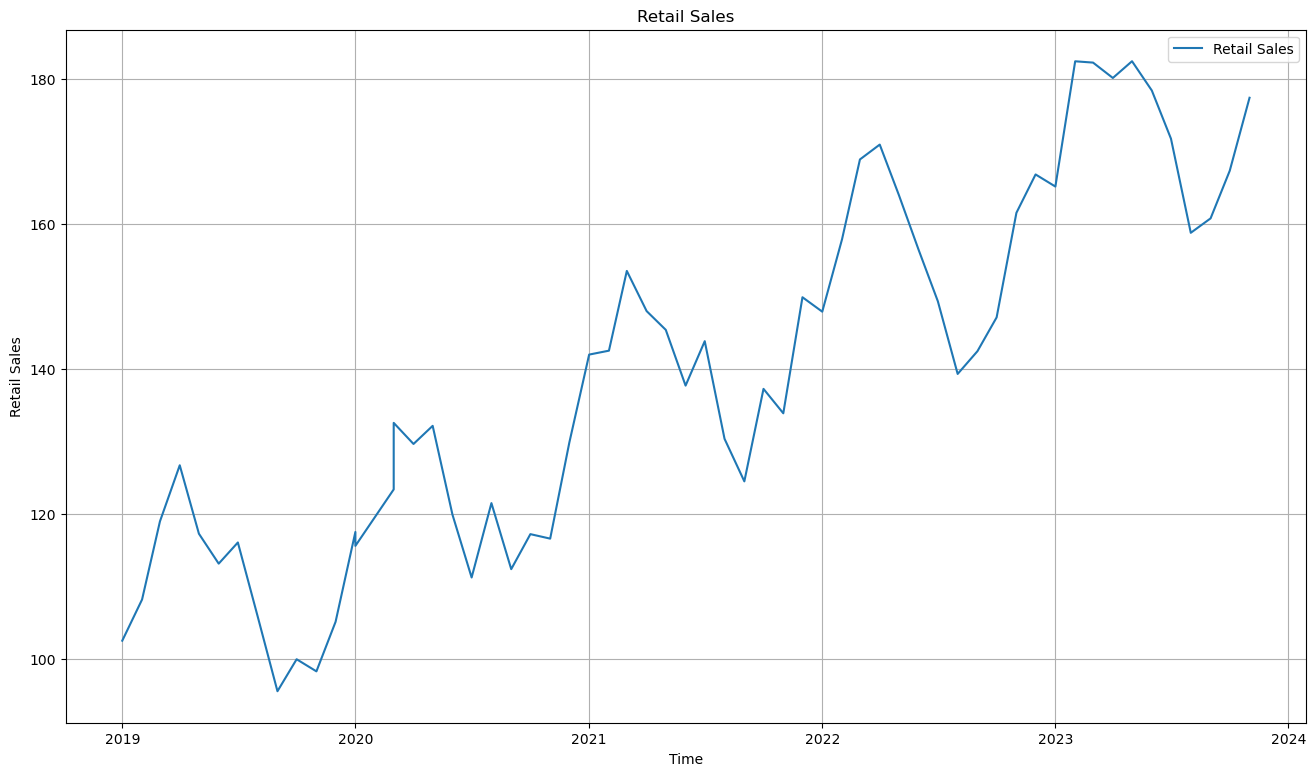

In [9]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Retail_Sales'], label='Retail Sales')
plt.title('Retail Sales')
plt.xlabel('Time')
plt.ylabel('Retail Sales')
plt.grid(True)
plt.legend()
plt.show()


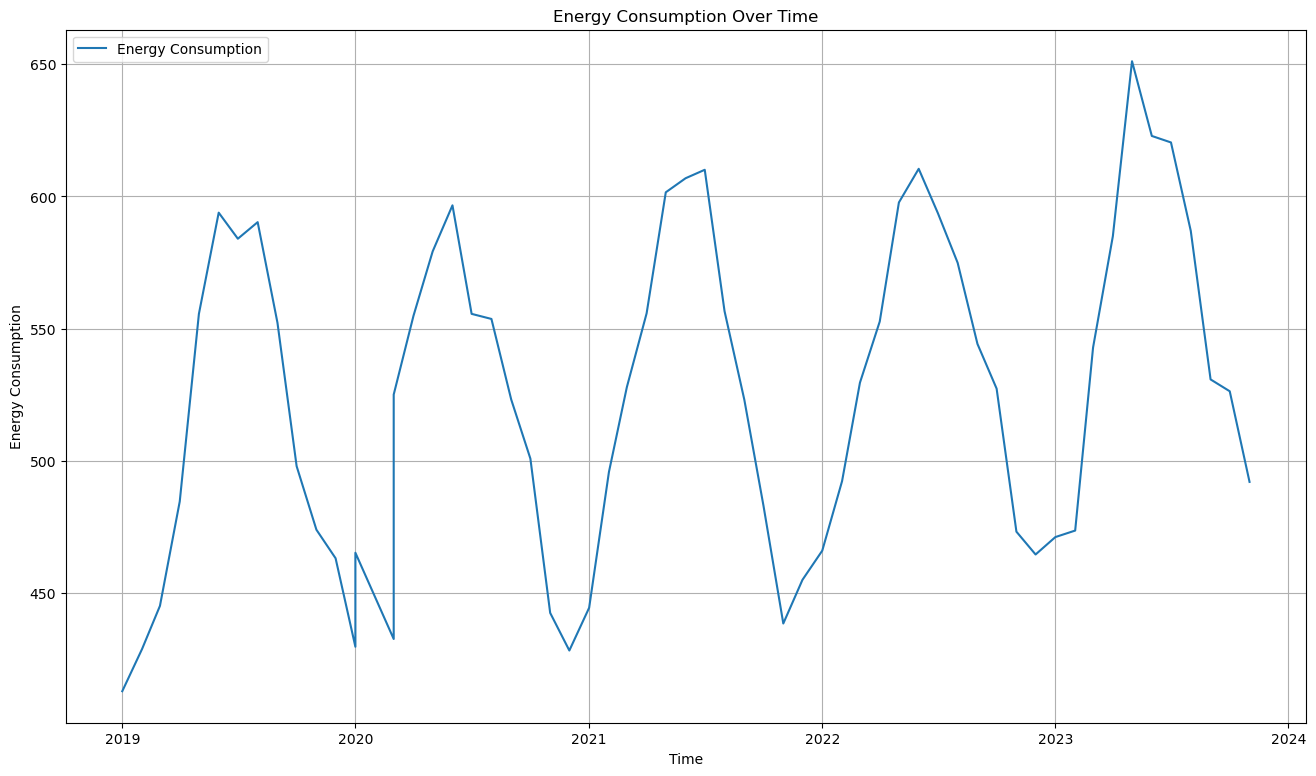

In [10]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Energy_Consumption'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.legend()
plt.show()

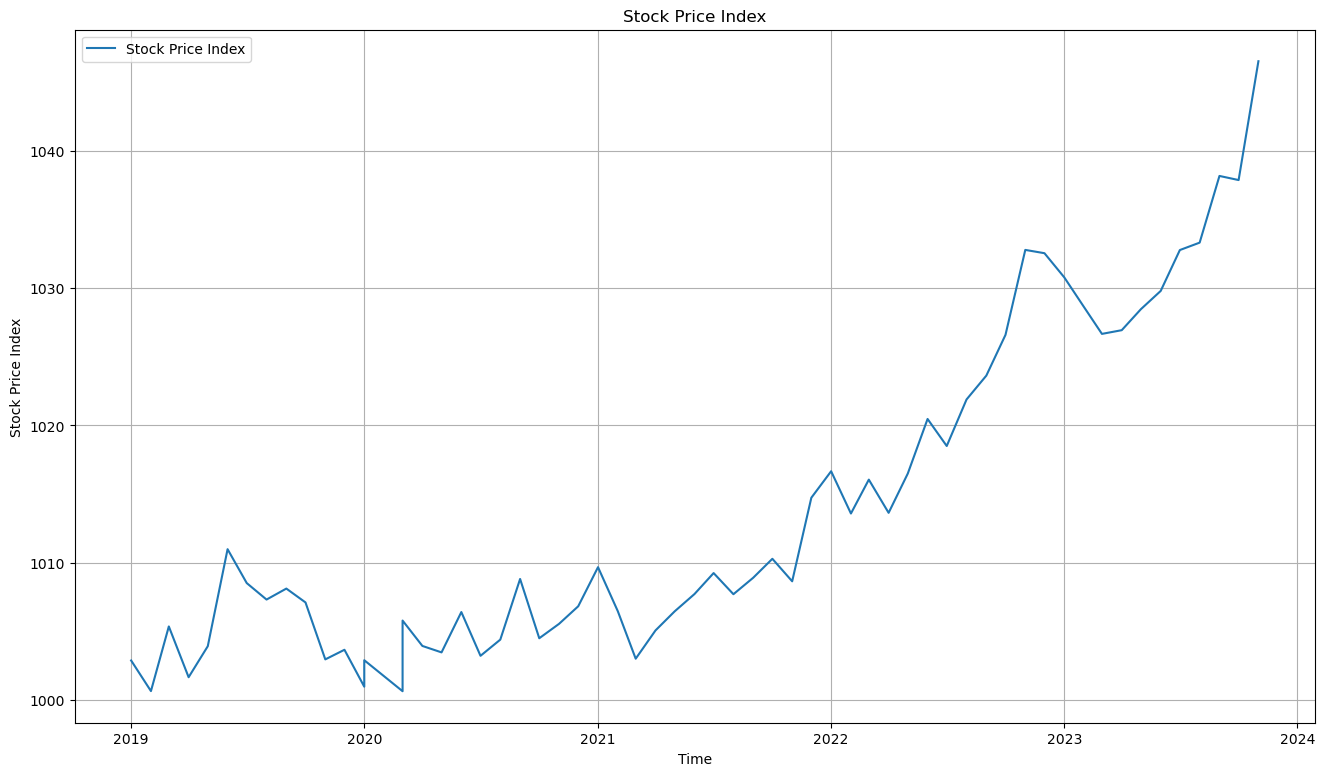

In [11]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Stock_Price_Index'], label='Stock Price Index')
plt.title('Stock Price Index')
plt.xlabel('Time')
plt.ylabel('Stock Price Index')
plt.grid(True)
plt.legend()
plt.show()

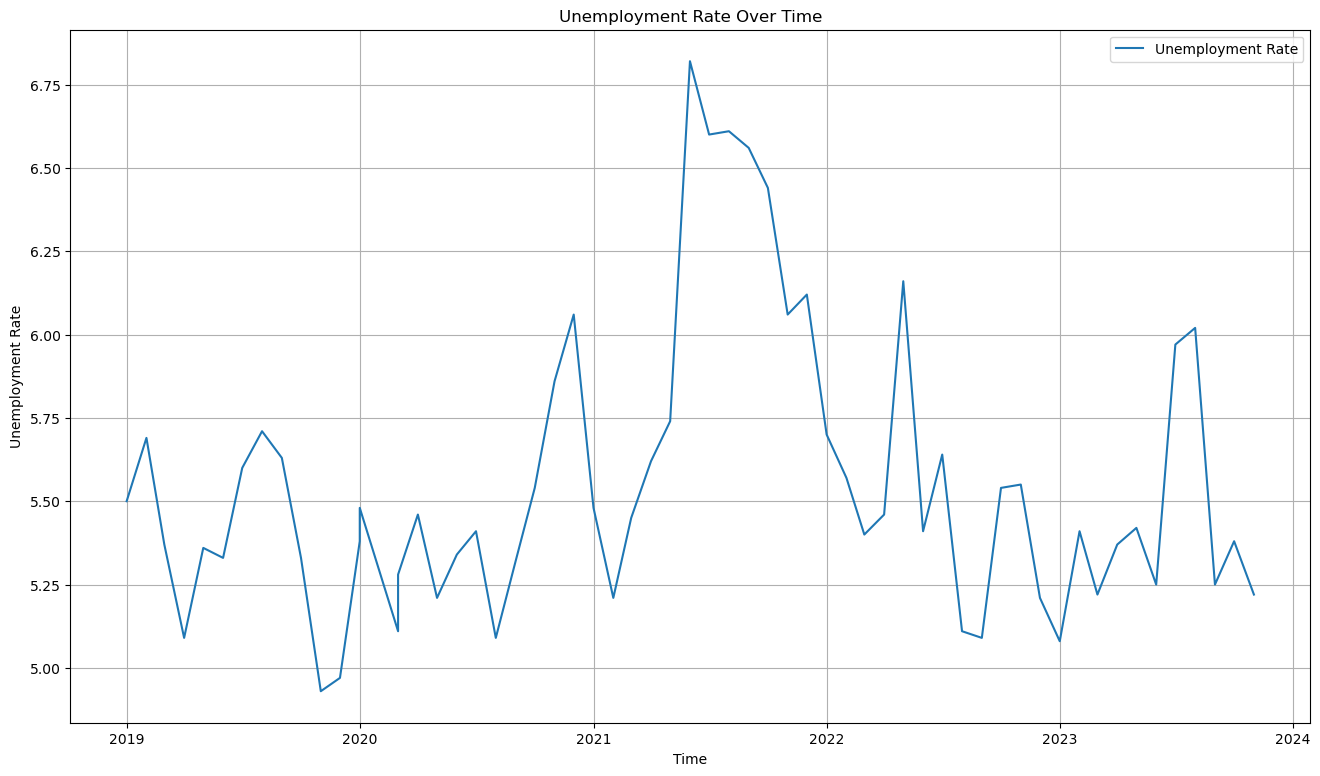

In [12]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Unemployment_Rate'], label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
df.describe()

,Retail_Sales,Energy_Consumption,Stock_Price_Index,Unemployment_Rate
count,60.000000,60.000000,60.000000,60.000000
mean,139.226667,524.944667,1013.850167,5.553167
std,24.634848,61.623736,11.719017,0.427010
min,95.510000,412.810000,1000.630000,4.930000
25%,117.420000,472.660000,1004.917500,5.272500
50%,138.475000,527.545000,1008.725000,5.435000
75%,159.247500,580.400000,1022.325000,5.692500
max,182.420000,651.150000,1046.540000,6.820000


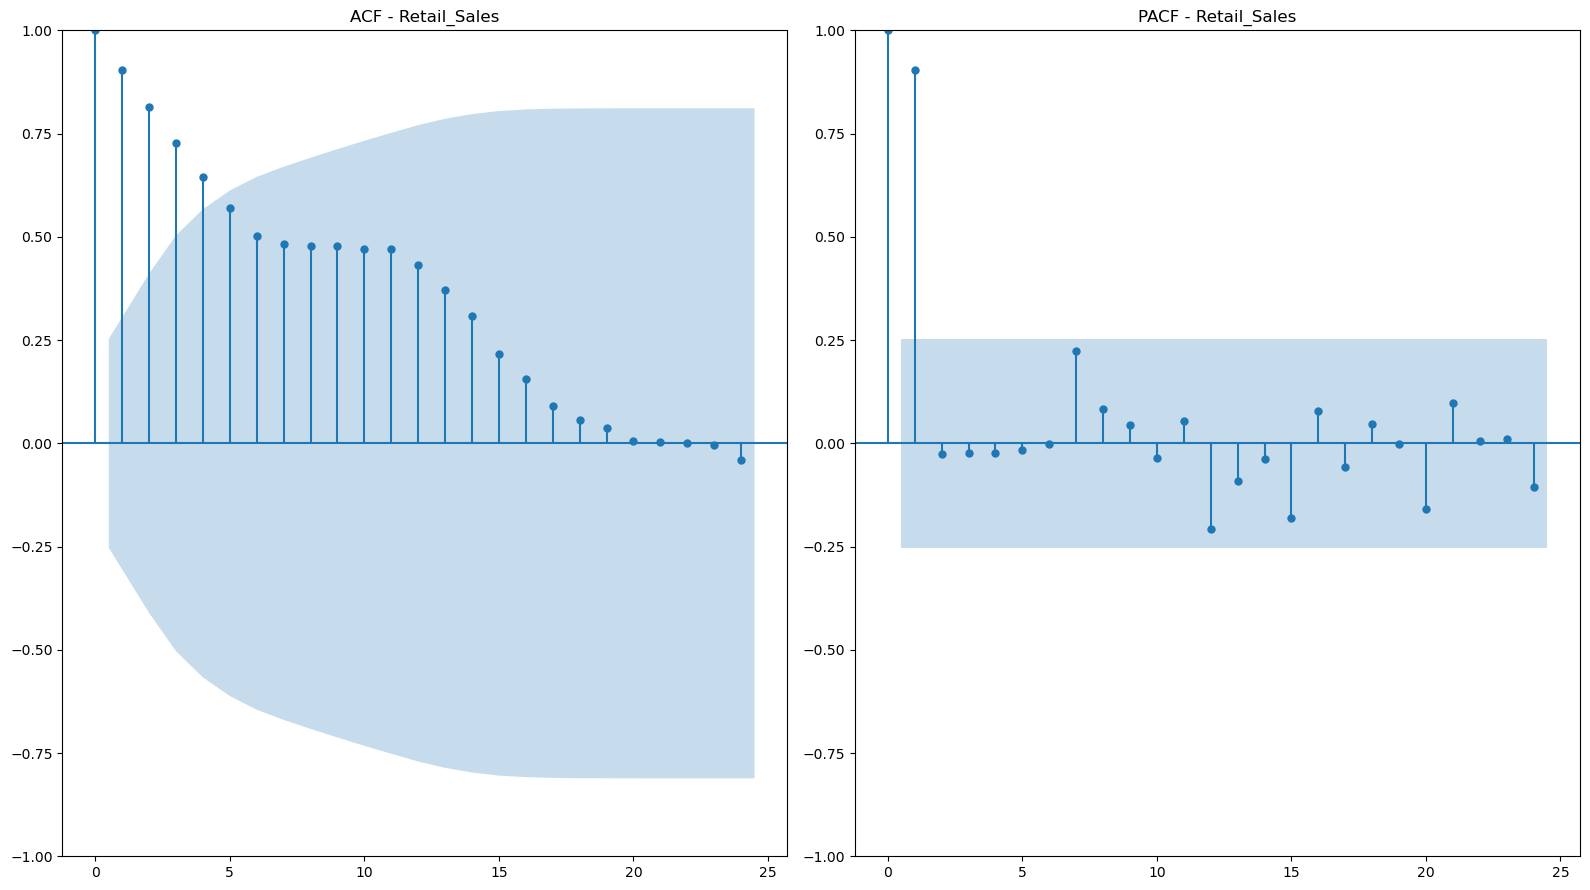

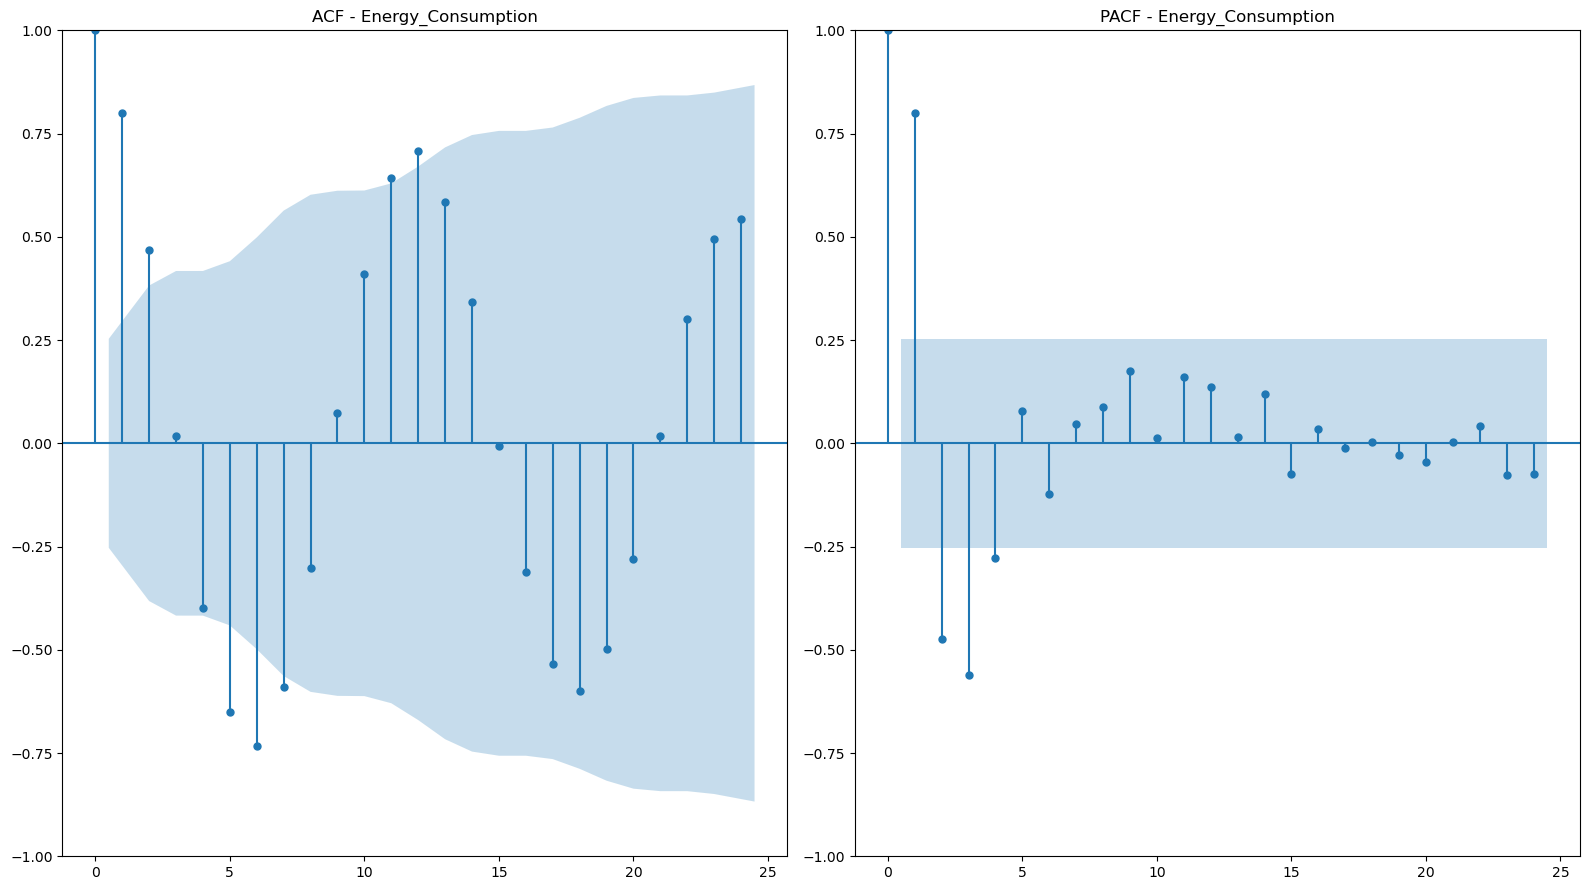

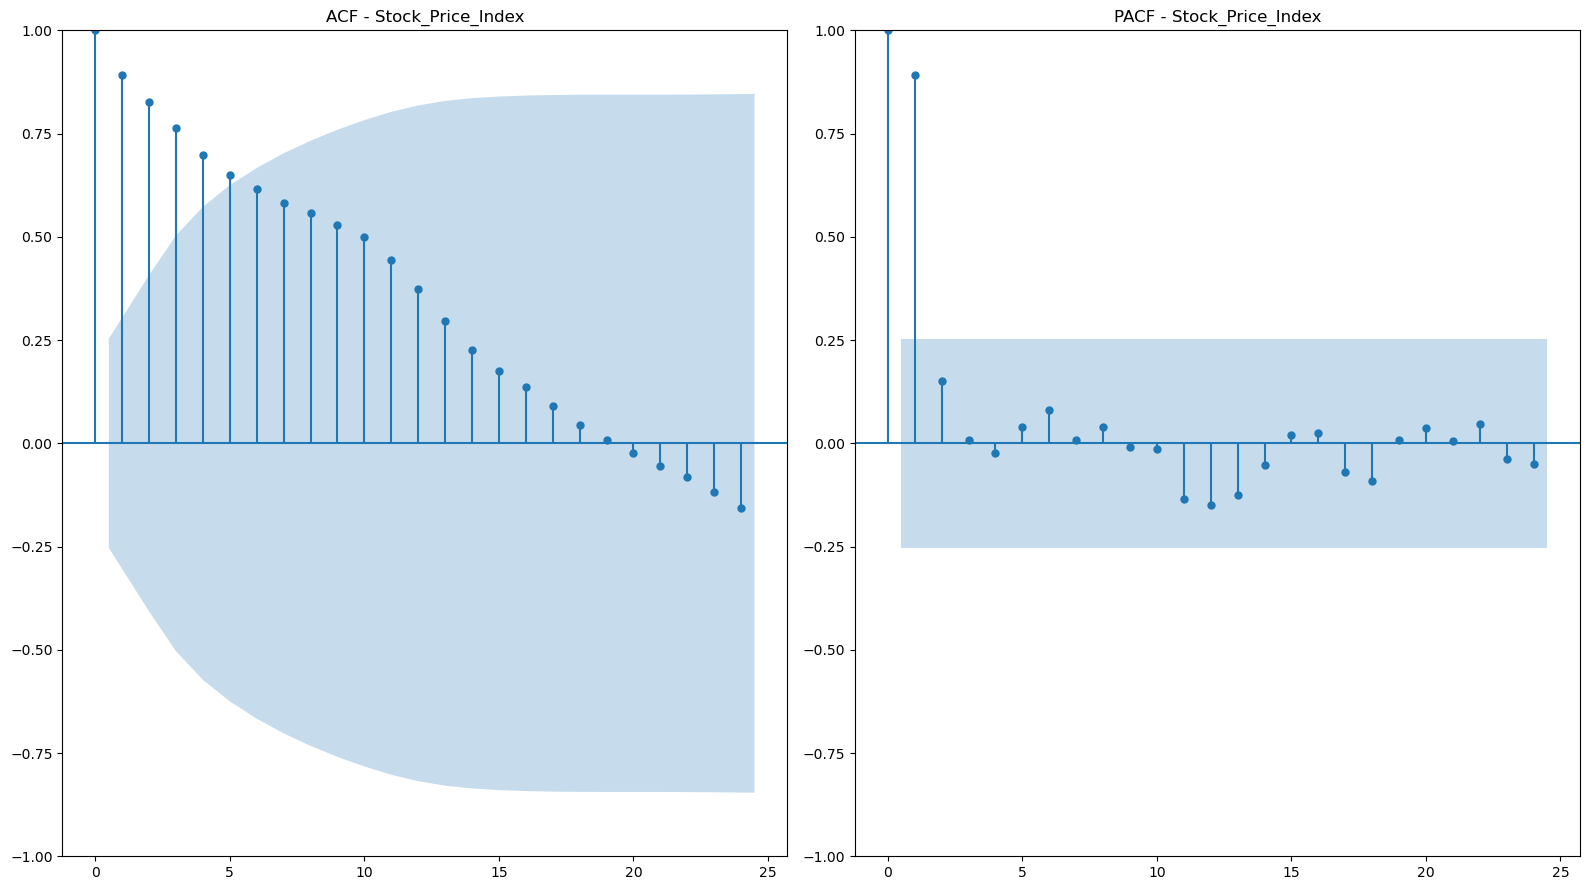

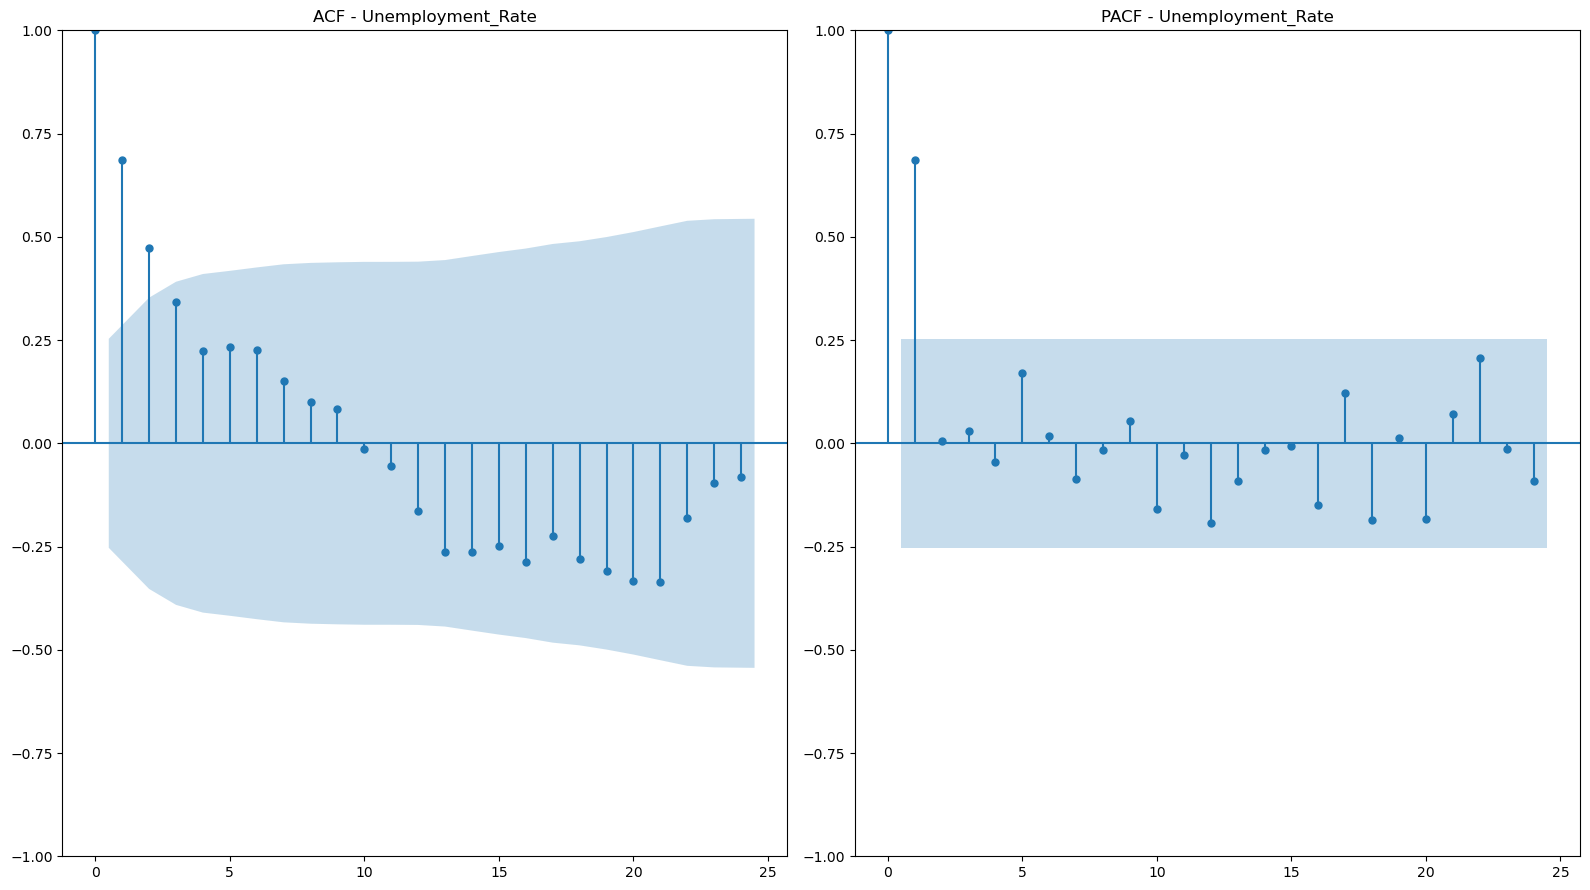

In [14]:
for col in df.columns:
    series = df[col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(16, 9))

    # ACF (up to 24 lags)
    plot_acf(series, ax=axes[0], lags=24)
    axes[0].set_title(f"ACF - {col}")

    # PACF (up to 24 lags)
    plot_pacf(series, ax=axes[1], lags=24, method="ywm")  
    axes[1].set_title(f"PACF - {col}")

    plt.tight_layout()
    plt.show()

In [15]:
def plot_decomposition_vertical(series, period=12, title=None):
    """
    Plots seasonal decomposition (observed, trend, seasonal, residual) for a given series vertically.
    Residuals include a 95% confidence interval (mean ± 1.96*std).
    
    Parameters:
    - series: pd.Series, time series data
    - period: int, seasonal period
    - title: str, optional title for the plots
    """
    decomposition = seasonal_decompose(series, period=period, model='additive')
    observed, trend, seasonal, resid = decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid

    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    
    # Observed
    axes[0].plot(observed, label='Observed', color='blue')
    axes[0].set_title(f"{title or series.name} - Observed")
    axes[0].legend()
    
    # Trend
    axes[1].plot(trend, label='Trend', color='orange')
    axes[1].set_title(f"{title or series.name} - Trend")
    axes[1].legend()
    
    # Seasonal
    axes[2].plot(seasonal, label='Seasonal', color='green')
    axes[2].set_title(f"{title or series.name} - Seasonal")
    axes[2].legend()
    
    # Residual + 95% CI
    axes[3].scatter(resid.index, resid.values, label='Residual', color='red')
    resid_mean = resid.mean()
    resid_std = resid.std()
    axes[3].fill_between(resid.index, resid_mean - 1.96*resid_std, resid_mean + 1.96*resid_std,
                         color='pink', alpha=0.3, label='95% CI')
    axes[3].set_title(f"{title or series.name} - Residuals with 95% CI")
    axes[3].legend()
    
    plt.tight_layout()
    plt.show()


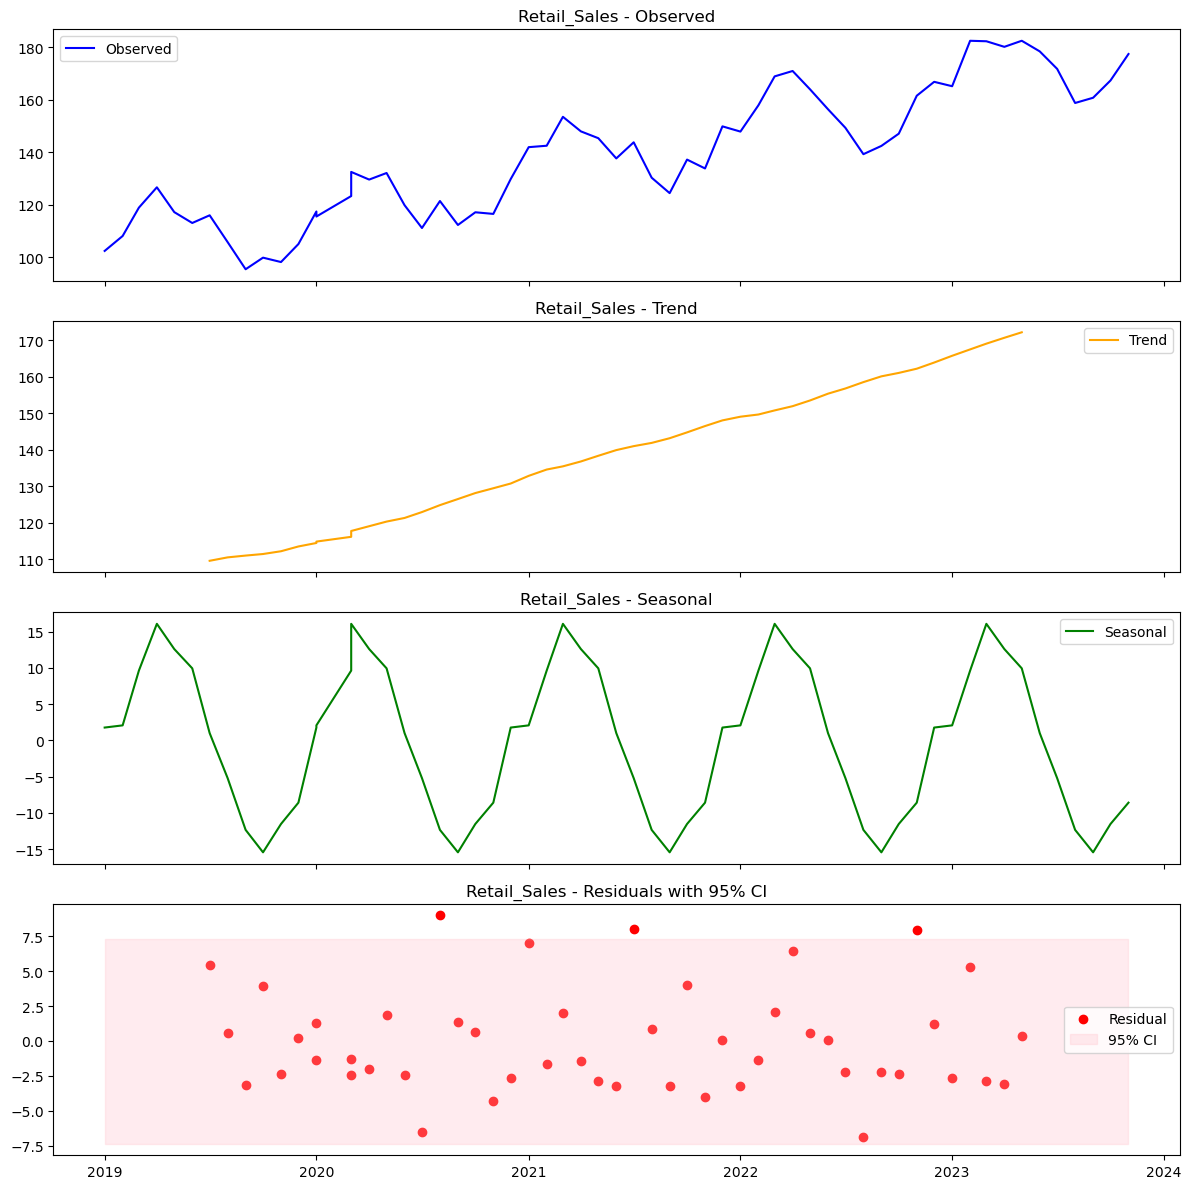

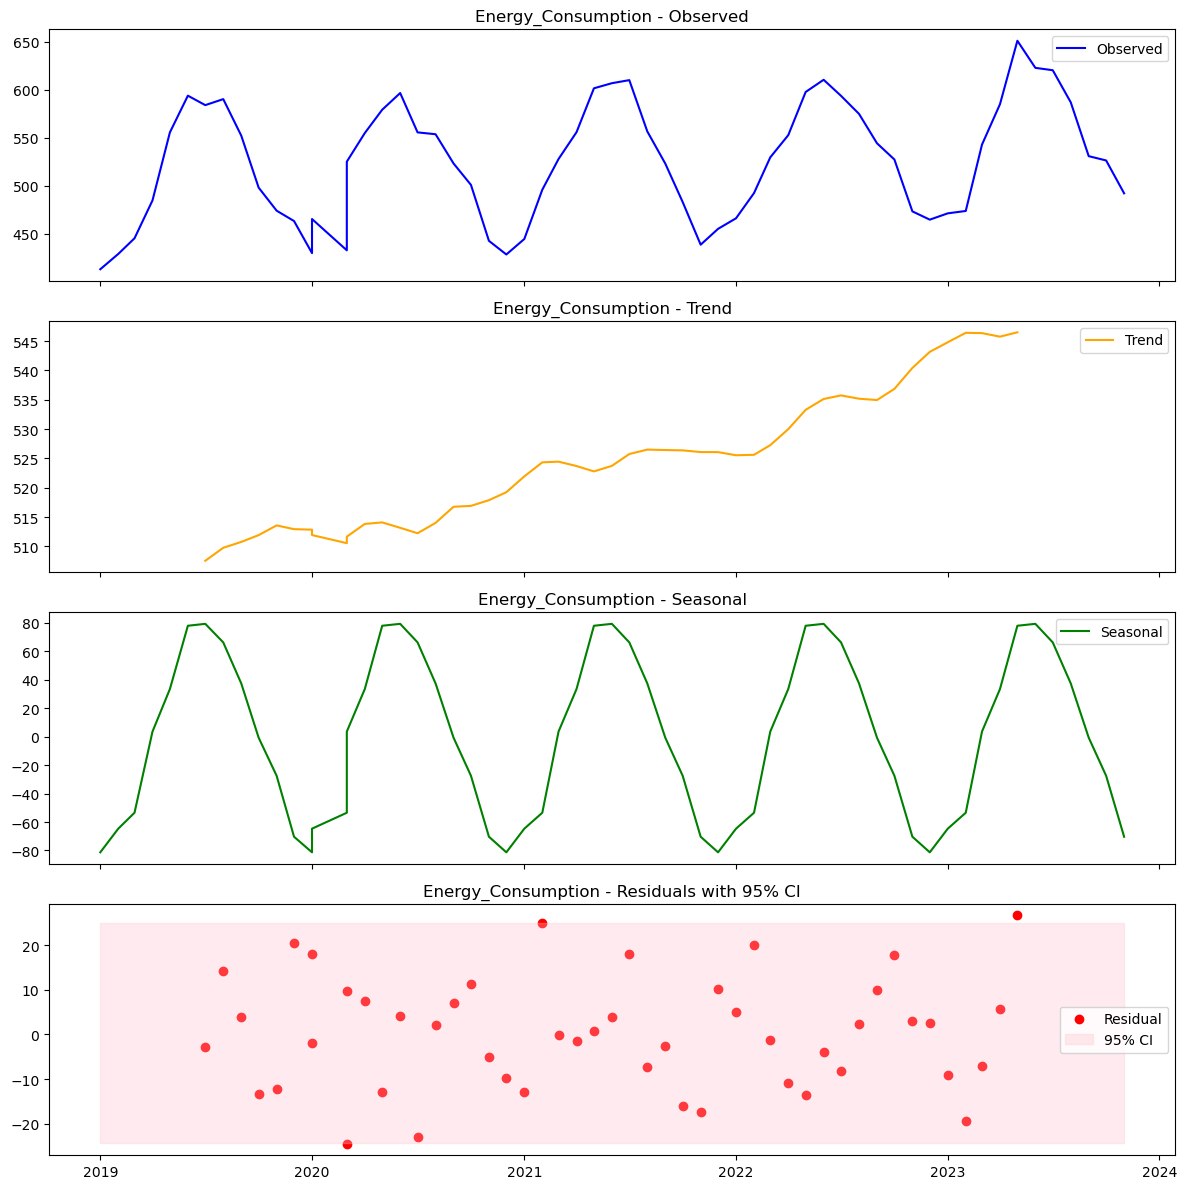

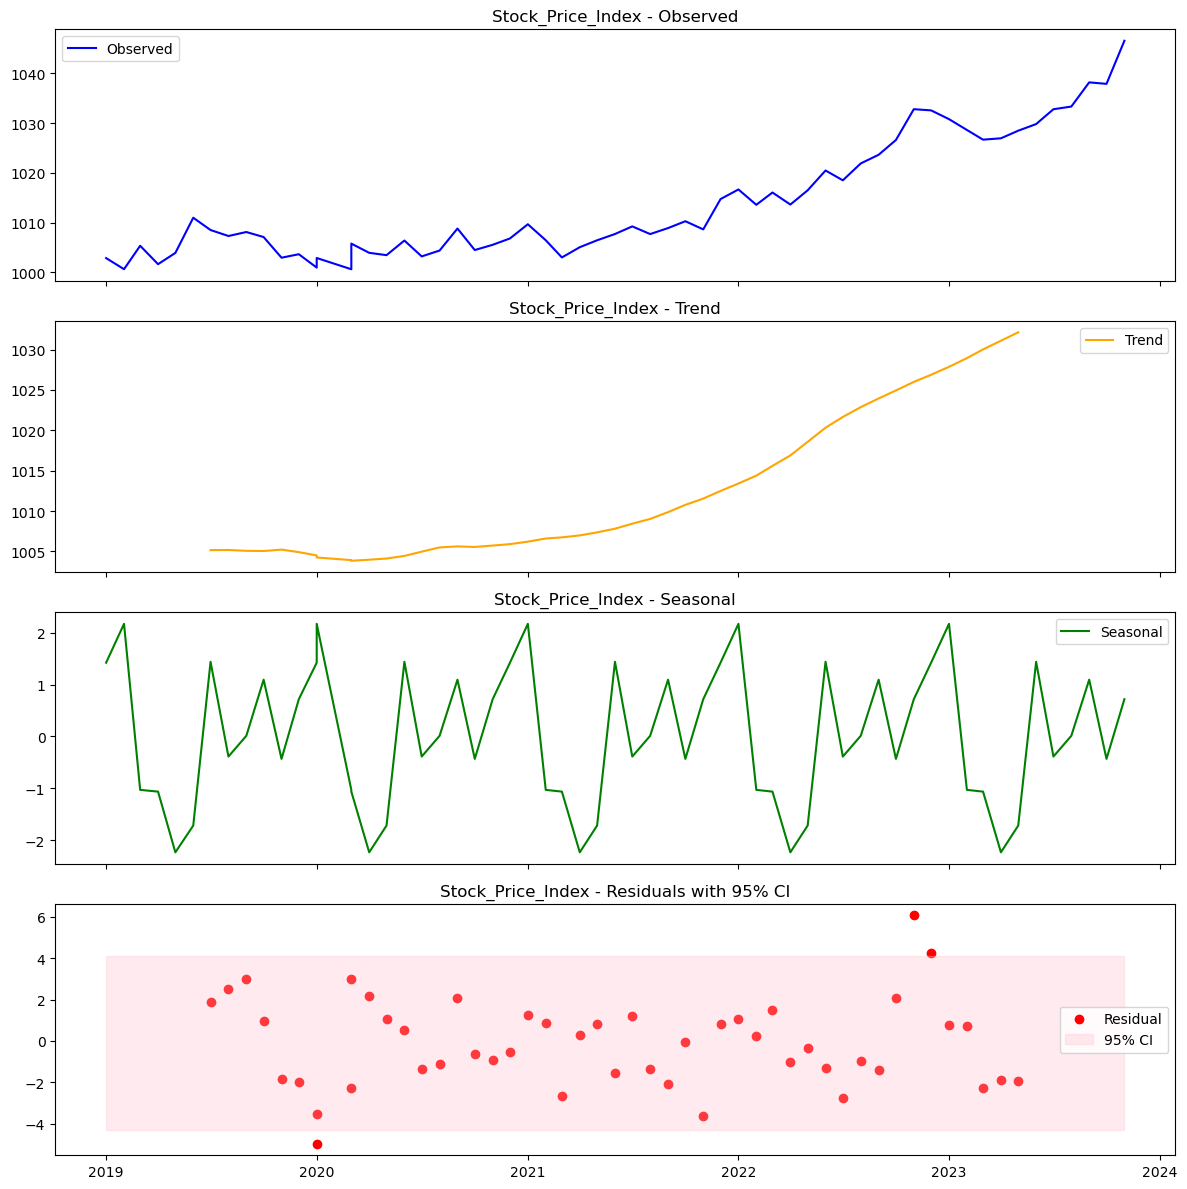

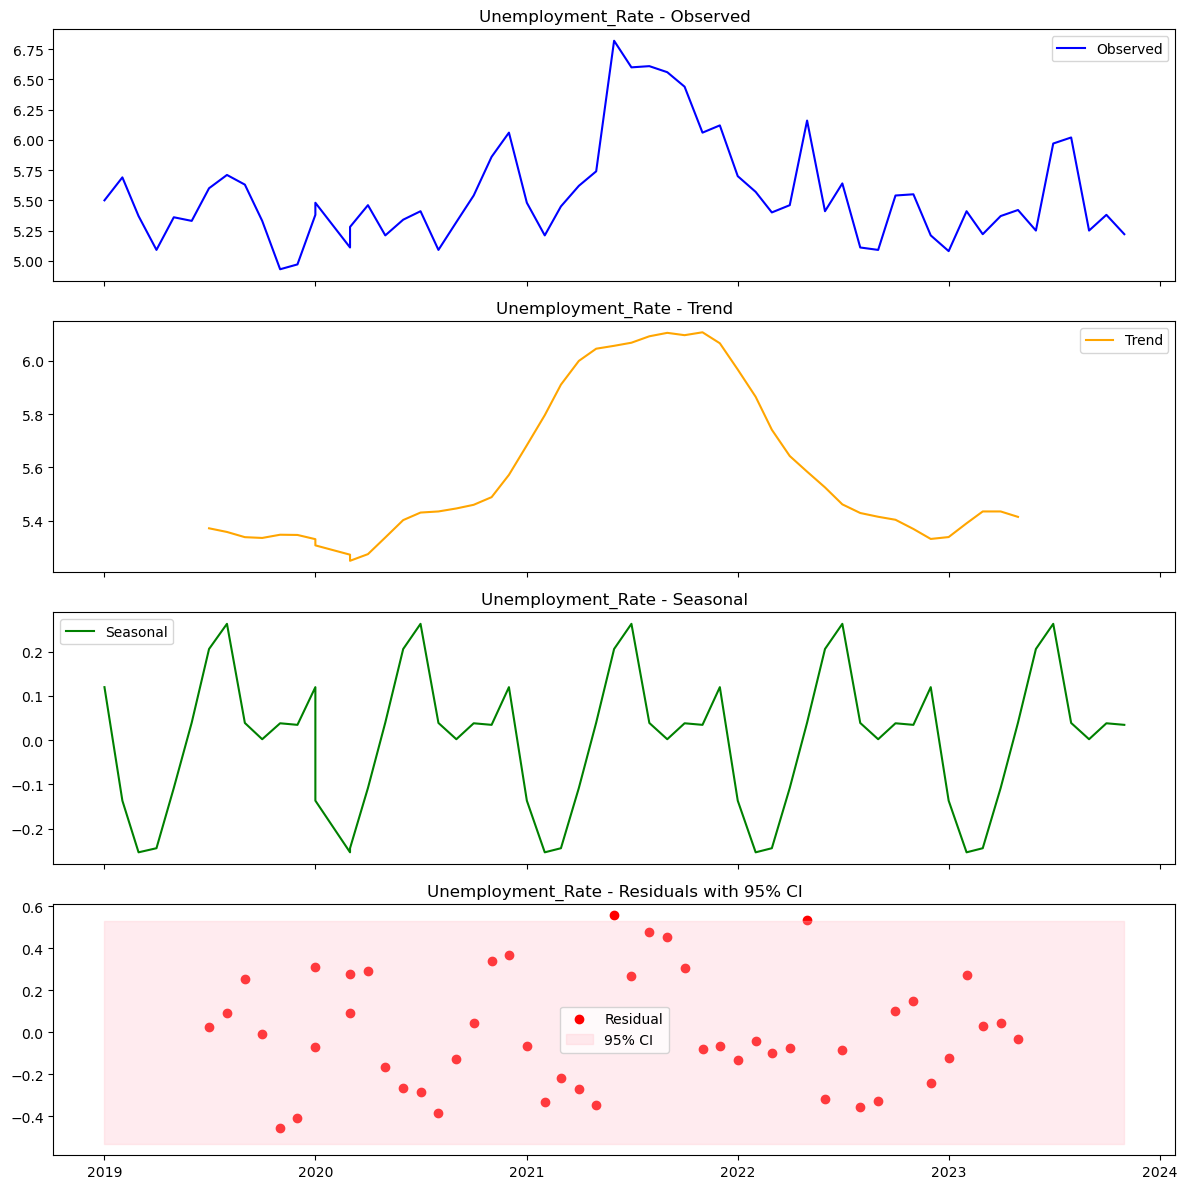

In [16]:
for col in df.columns:
    plot_decomposition_vertical(df[col], period=12, title=col)

## Testing of Unit Root:

In [17]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# -------- Helper Functions -------- #

def adf_test(series):
    stat, p, _, _, _, _ = adfuller(series, autolag='AIC')
    return stat, p

def kpss_test(series, regression='c'):
    stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
    return stat, p

def adf_conclusion(p):
    return "Stationary" if p < 0.05 else "Non-stationary"

def kpss_conclusion(p):
    return "Non-stationary" if p < 0.05 else "Stationary"

# Run ADF + KPSS tests and return tables
def run_stationarity_tests(df):
    adf_rows = []
    kpss_rows = []
    disagreements = []

    for col in df.columns:
        series = df[col]

        # --- ADF ---
        adf_stat, adf_p = adf_test(series)
        adf_result = adf_conclusion(adf_p)

        # --- KPSS ---
        kpss_stat, kpss_p = kpss_test(series)
        kpss_result = kpss_conclusion(kpss_p)

        # Store results
        adf_rows.append([col, adf_stat, adf_p, adf_result])
        kpss_rows.append([col, kpss_stat, kpss_p, kpss_result])

        # ------------------------------------
        # Detect disagreement between tests
        # ------------------------------------
        if adf_result != kpss_result:
            disagreements.append(
                f"{col}: ADF → {adf_result}, KPSS → {kpss_result} (CONFLICT)"
            )

    return (
        pd.DataFrame(adf_rows, columns=["Series", "ADF Statistic", "p-value", "Conclusion"]),
        pd.DataFrame(kpss_rows, columns=["Series", "KPSS Statistic", "p-value", "Conclusion"]),
        disagreements
    )



In [18]:

# ============================
# 1. BEFORE DIFFERENCING
# ============================

adf_before, kpss_before, disagree_before = run_stationarity_tests(df)

print("\n===== ADF Before Differencing =====\n")
print(adf_before)

print("\n===== KPSS Before Differencing =====\n")
print(kpss_before)

print("\n===== DISAGREEMENTS Before Differencing =====\n")
if disagree_before:
    for d in disagree_before:
        print(" -", d)
else:
    print("No disagreements between ADF and KPSS.")


# ========= AUTO-DETECT NON-STATIONARY SERIES ========= #

non_stationary_cols = []

for col in df.columns:
    adf_status = adf_before.loc[adf_before["Series"] == col, "Conclusion"].values[0]
    kpss_status = kpss_before.loc[kpss_before["Series"] == col, "Conclusion"].values[0]

    # If ANY test sees non-stationarity → treat as non-stationary
    if adf_status == "Non-stationary" or kpss_status == "Non-stationary":
        non_stationary_cols.append(col)

print("\nAUTO-DETECTED Non-stationary columns:")
print(non_stationary_cols)


===== ADF Before Differencing =====

               Series  ADF Statistic   p-value      Conclusion
0        Retail_Sales       1.119357  0.995378  Non-stationary
1  Energy_Consumption      -0.284920  0.927613  Non-stationary
2   Stock_Price_Index       1.307748  0.996652  Non-stationary
3   Unemployment_Rate      -3.179352  0.021211      Stationary

===== KPSS Before Differencing =====

               Series  KPSS Statistic  p-value      Conclusion
0        Retail_Sales        1.155900     0.01  Non-stationary
1  Energy_Consumption        0.193050     0.10      Stationary
2   Stock_Price_Index        1.134170     0.01  Non-stationary
3   Unemployment_Rate        0.182885     0.10      Stationary

===== DISAGREEMENTS Before Differencing =====

 - Energy_Consumption: ADF → Non-stationary, KPSS → Stationary (CONFLICT)

AUTO-DETECTED Non-stationary columns:
['Retail_Sales', 'Energy_Consumption', 'Stock_Price_Index']


C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\1598526927.py:11: InterpolationWarning: The t

In [19]:

# ============================
# 2. FIRST DIFFERENCING
# ============================

df_diff = df[non_stationary_cols].diff().dropna()


# ============================
# 3. AFTER DIFFERENCING
# ============================

adf_after, kpss_after, disagree_after = run_stationarity_tests(df_diff)

print("\n===== ADF After Differencing =====\n")
print(adf_after)

print("\n===== KPSS After Differencing =====\n")
print(kpss_after)

print("\n===== DISAGREEMENTS After Differencing =====\n")
if disagree_after:
    for d in disagree_after:
        print(" -", d)
else:
    print("No disagreements between ADF and KPSS after differencing.")


===== ADF After Differencing =====

               Series  ADF Statistic       p-value  Conclusion
0        Retail_Sales      -7.359178  9.600840e-11  Stationary
1  Energy_Consumption      -6.521267  1.040749e-08  Stationary
2   Stock_Price_Index      -9.032637  5.393197e-15  Stationary

===== KPSS After Differencing =====

               Series  KPSS Statistic   p-value  Conclusion
0        Retail_Sales        0.026430  0.100000  Stationary
1  Energy_Consumption        0.059407  0.100000  Stationary
2   Stock_Price_Index        0.386687  0.082894  Stationary

===== DISAGREEMENTS After Differencing =====

No disagreements between ADF and KPSS after differencing.


C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9592\1598526927.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, _, _ = kpss(series, regression=regression, nlags="auto")




=== Processing series: Retail_Sales (n=60) ===

Chosen d (auto): 1
Stationarity tests by d:
 d=0: ADF_p=0.9953784911688153, KPSS_p=0.01, stationary_by_both=False
 d=1: ADF_p=9.600840147703076e-11, KPSS_p=0.1, stationary_by_both=True
Suggested p, q: 0 0


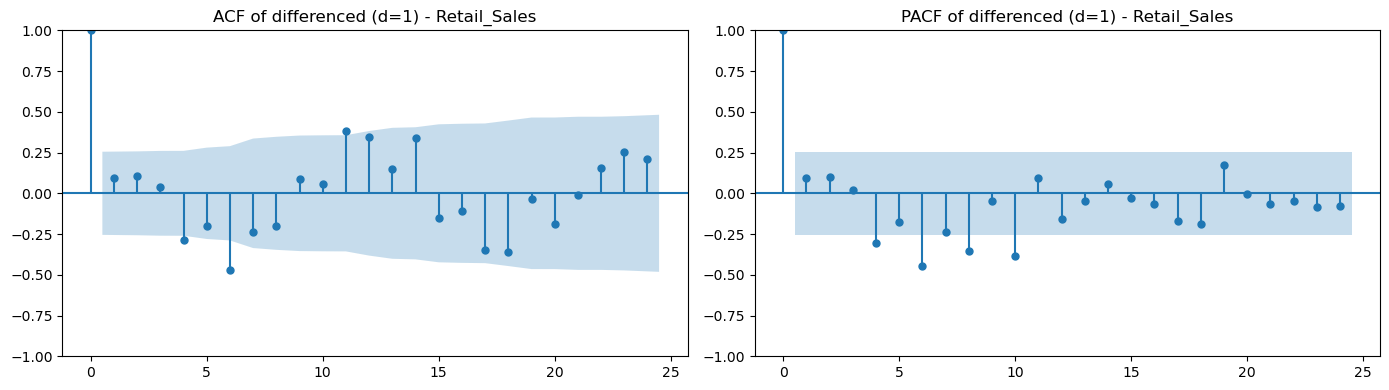

Fitting candidate models: [(0, 1, 0), (1, 1, 0), (0, 1, 1)]

Model comparison (sorted by AIC):


,p,d,q,AIC,BIC,Converged
0,0,1,0,418.556821,420.634358,True
1,1,1,0,419.842290,423.997365,True
2,0,1,1,419.972531,424.127606,True



Selected best model: (0, 1, 0)
AIC: 418.5568207807602 BIC: 420.6343582246659

Residual diagnostics for best model:


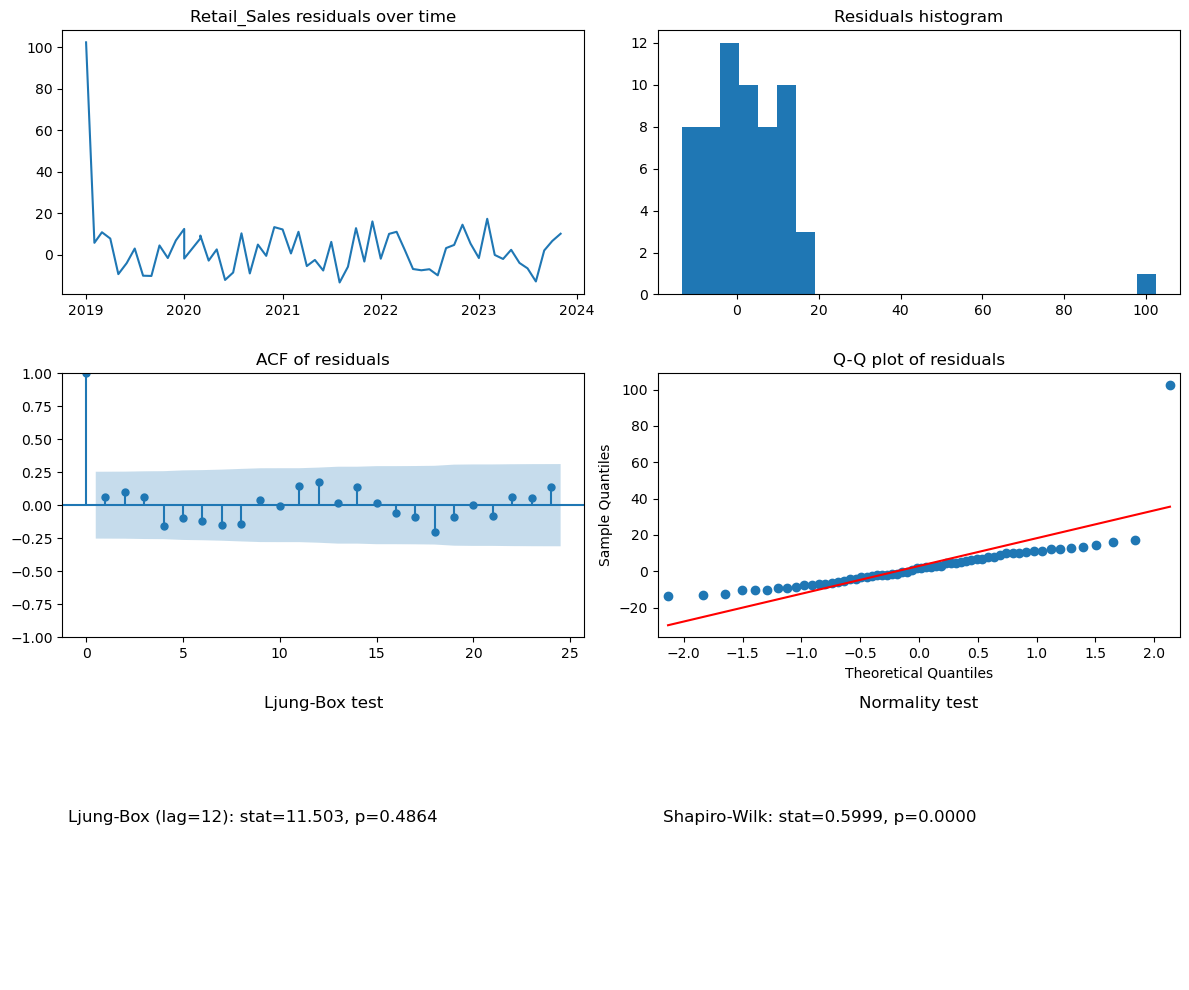

Diagnostics summary: {'resid_mean': 2.956333333332893, 'resid_std': 15.404934820899244, 'ljungbox_stat': 11.50306968145324, 'ljungbox_pvalue': 0.4863667537569728, 'shapiro_stat': 0.5998741881674383, 'shapiro_pvalue': 1.5900639929566413e-11, 'resid_len': 60}


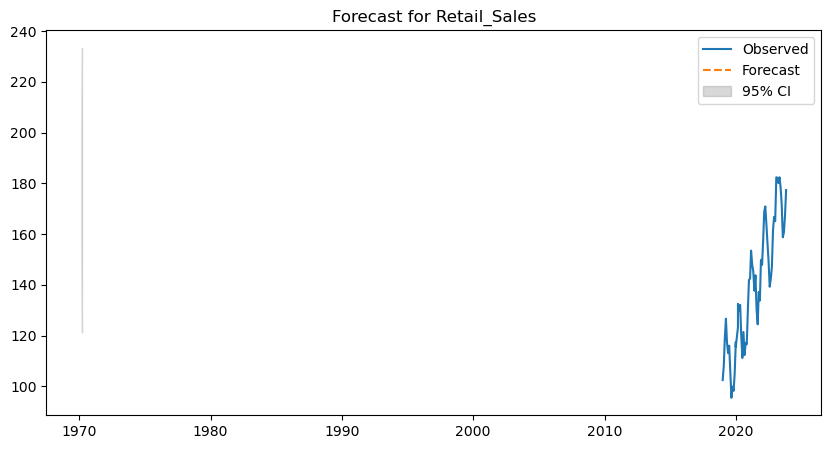



=== Processing series: Energy_Consumption (n=60) ===

Chosen d (auto): 1
Stationarity tests by d:
 d=0: ADF_p=0.9276130942176284, KPSS_p=0.1, stationary_by_both=False
 d=1: ADF_p=1.0407493554950467e-08, KPSS_p=0.1, stationary_by_both=True
Suggested p, q: 1 2


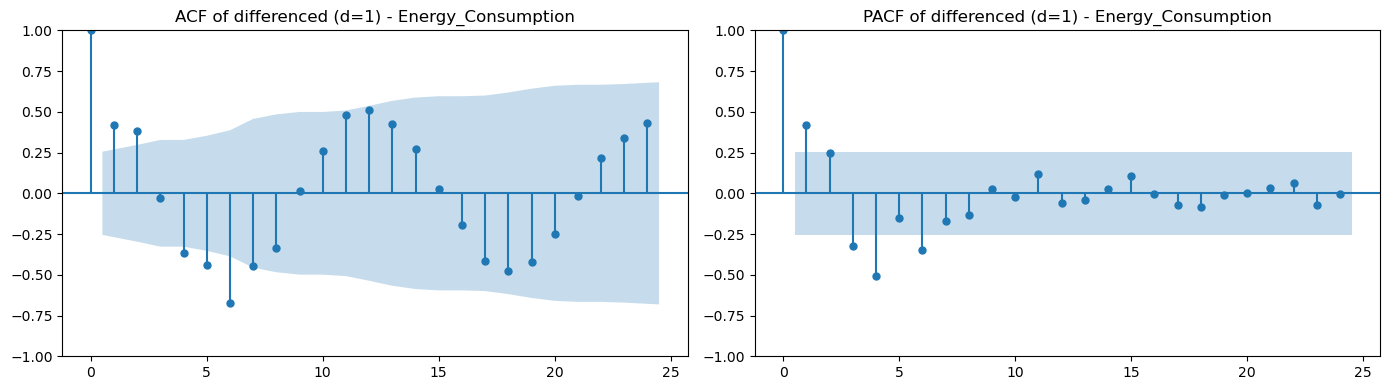

Fitting candidate models: [(1, 1, 2), (2, 1, 2), (1, 1, 3)]

Model comparison (sorted by AIC):


,p,d,q,AIC,BIC,Converged
0,1,1,3,571.294390,581.682077,False
1,1,1,2,573.938264,582.248413,True
2,2,1,2,575.670635,586.058322,True



Selected best model: (1, 1, 3)
AIC: 571.2943897723634 BIC: 581.682076991892

Residual diagnostics for best model:


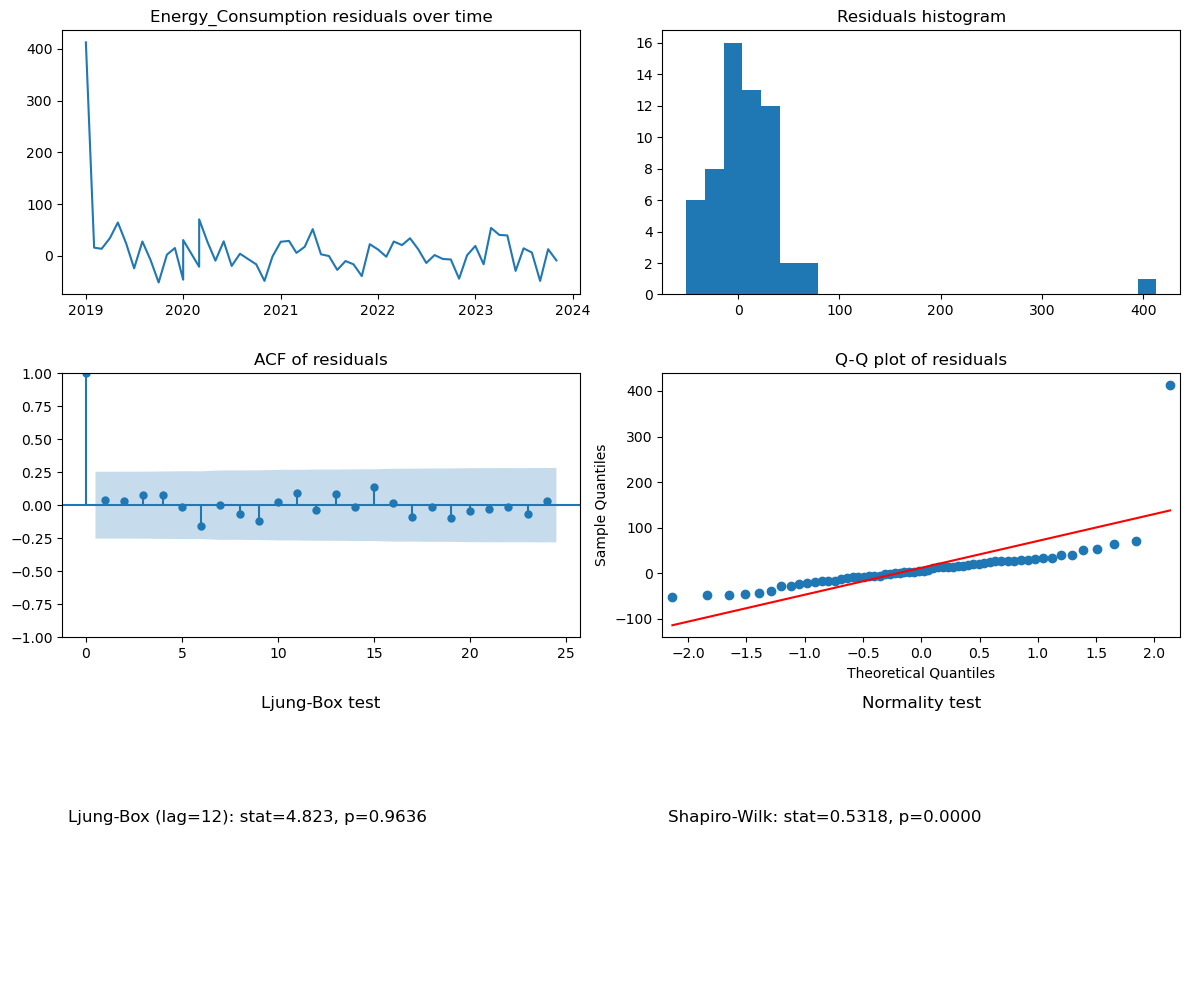

Diagnostics summary: {'resid_mean': 11.77847451068499, 'resid_std': 59.51329814775486, 'ljungbox_stat': 4.823221828076284, 'ljungbox_pvalue': 0.9636241569896902, 'shapiro_stat': 0.53184791339275, 'shapiro_pvalue': 1.514006203027457e-12, 'resid_len': 60}


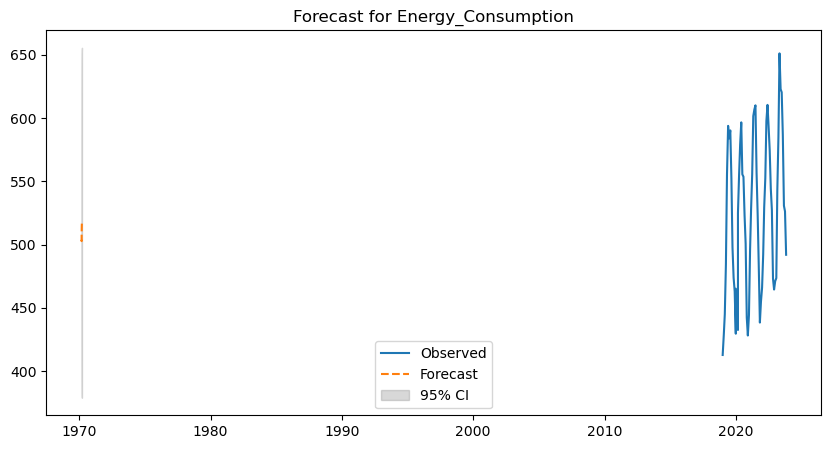



=== Processing series: Stock_Price_Index (n=60) ===

Chosen d (auto): 1
Stationarity tests by d:
 d=0: ADF_p=0.9966519664756434, KPSS_p=0.01, stationary_by_both=False
 d=1: ADF_p=5.3931969239063665e-15, KPSS_p=0.0828936205523599, stationary_by_both=True
Suggested p, q: 0 0


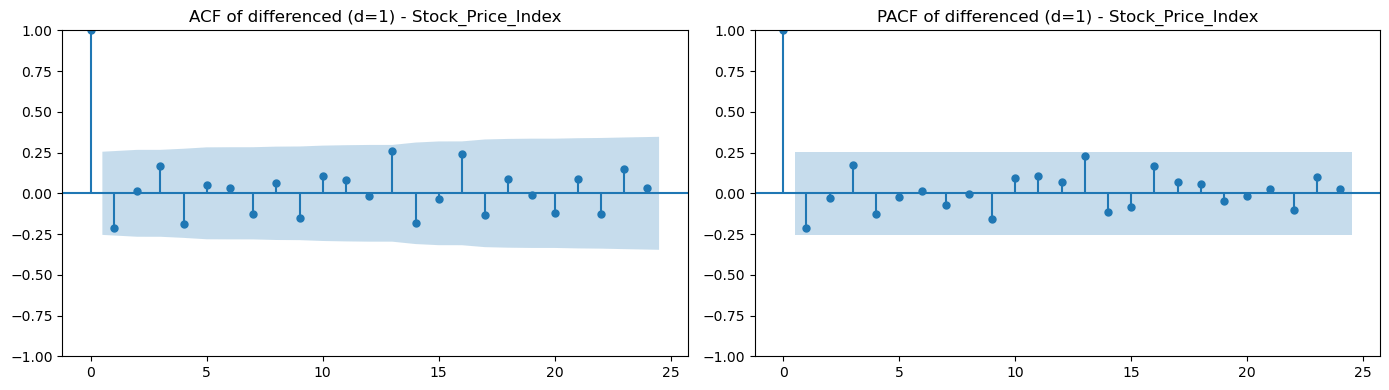

Fitting candidate models: [(0, 1, 0), (1, 1, 0), (0, 1, 1)]

Model comparison (sorted by AIC):


,p,d,q,AIC,BIC,Converged
0,0,1,0,301.645990,303.723528,True
1,1,1,0,302.083942,306.239017,True
2,0,1,1,302.324053,306.479128,True



Selected best model: (0, 1, 0)
AIC: 301.64599018182804 BIC: 303.72352762573377

Residual diagnostics for best model:


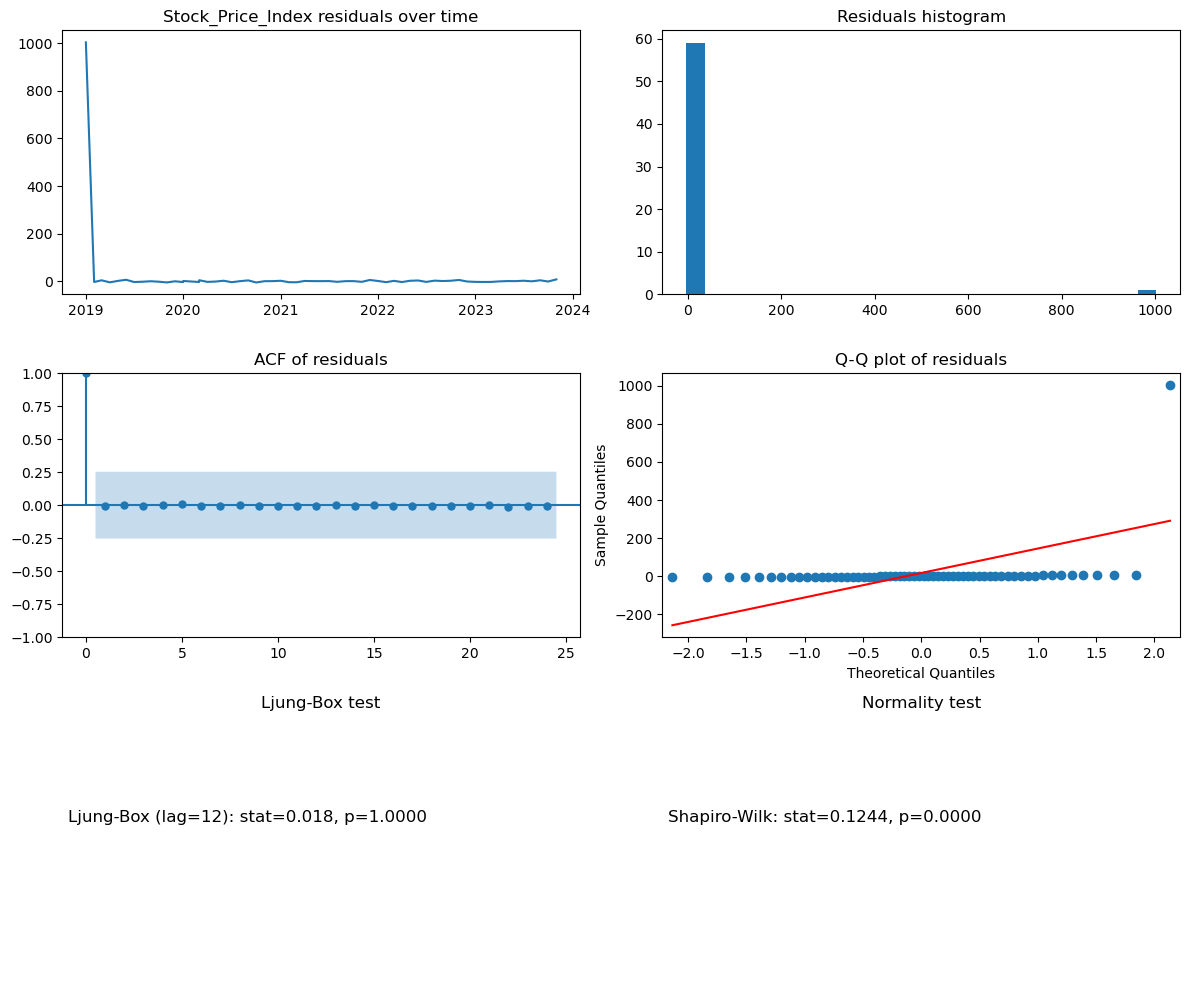

Diagnostics summary: {'resid_mean': 17.44233333333328, 'resid_std': 129.40861741885618, 'ljungbox_stat': 0.017812910559046272, 'ljungbox_pvalue': 0.9999999999999993, 'shapiro_stat': 0.12439664143725393, 'shapiro_pvalue': 4.1810605567492333e-17, 'resid_len': 60}


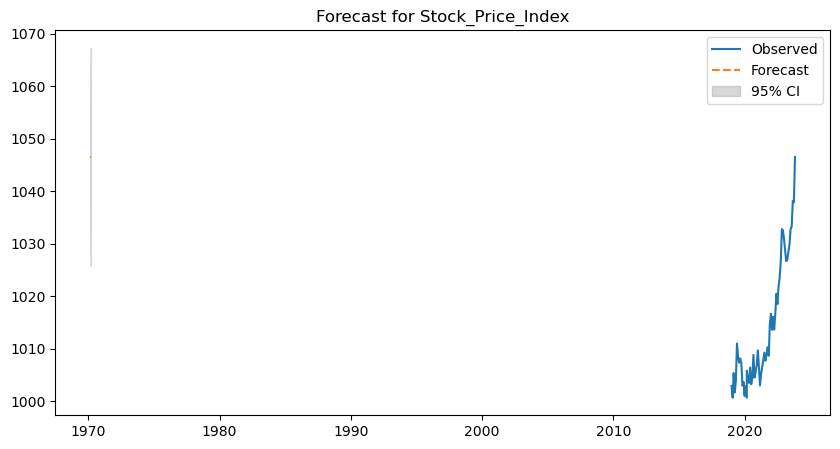



=== Processing series: Unemployment_Rate (n=60) ===

Chosen d (auto): 0
Stationarity tests by d:
 d=0: ADF_p=0.021211416387248223, KPSS_p=0.1, stationary_by_both=True
Suggested p, q: 1 3


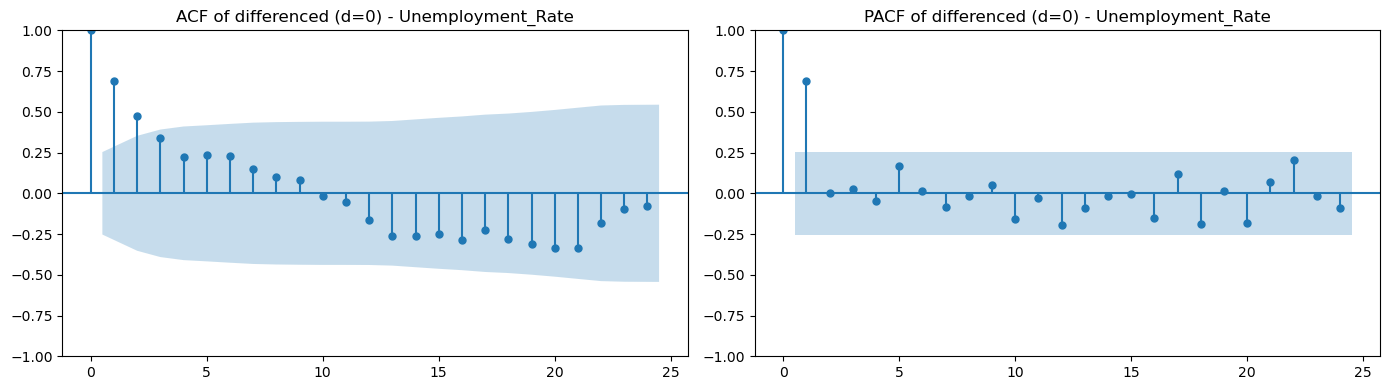

Fitting candidate models: [(1, 0, 3), (2, 0, 3), (1, 0, 4)]

Model comparison (sorted by AIC):


,p,d,q,AIC,BIC,Converged
0,1,0,3,39.458343,52.024411,True
1,2,0,3,40.057553,54.717965,True
2,1,0,4,40.952509,55.612921,True



Selected best model: (1, 0, 3)
AIC: 39.45834343377675 BIC: 52.02441080710935

Residual diagnostics for best model:


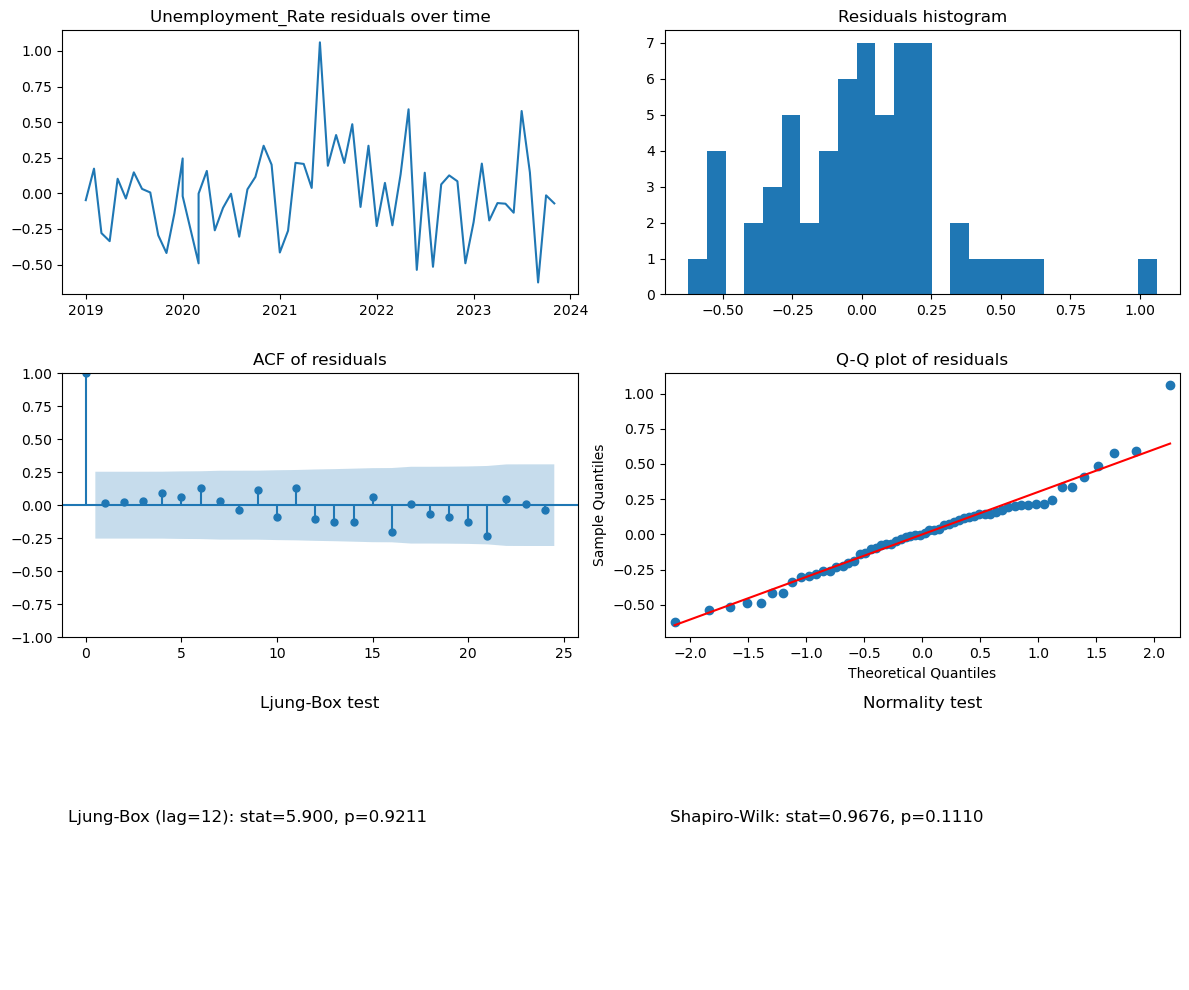

Diagnostics summary: {'resid_mean': -0.0005566961940723037, 'resid_std': 0.3048530645287407, 'ljungbox_stat': 5.899598875221137, 'ljungbox_pvalue': 0.9210583037871002, 'shapiro_stat': 0.9675817770042648, 'shapiro_pvalue': 0.11101117509700525, 'resid_len': 60}


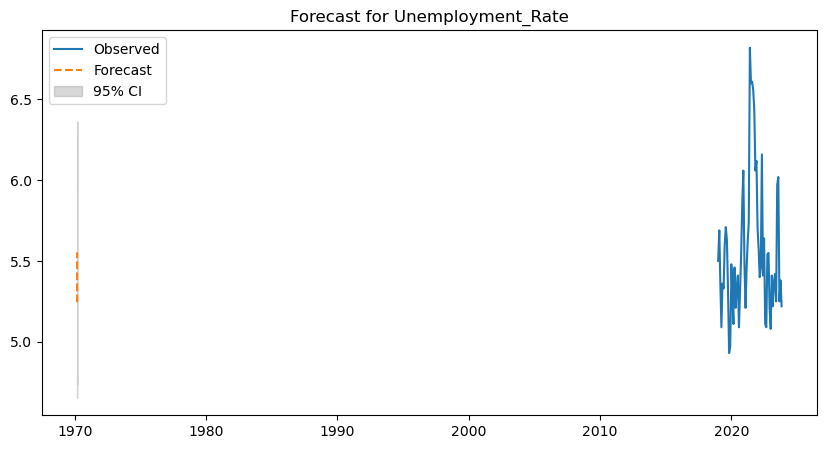

In [20]:
# Full automated ARIMA modeling workflow for multiple series
# Steps included:
# 1) Choose d automatically (ADF + KPSS rules)
# 2) Plot ACF/PACF for differenced series and suggest p, q
# 3) Fit 3 ARIMA models per series
# 4) Compare by AIC/BIC
# 5) Select best model and justify
# 6) Residual diagnostics (plots, ACF, Ljung-Box, Q-Q, Shapiro)
# 7) White-noise assessment
# 8) 12-step forecast with 95% CI

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

# ---------- Helper test functions ----------

def adf_test_stat_p(series):
    stat, p, _, _, _, _ = adfuller(series, autolag='AIC')
    return stat, p

def kpss_test_stat_p(series, regression='c'):
    stat, p, _, _ = kpss(series, regression=regression, nlags="auto")
    return stat, p

def is_stationary_by_both(series, adf_alpha=0.05, kpss_alpha=0.05):
    # ADF: stationary if p < alpha
    # KPSS: stationary if p >= alpha
    _, adf_p = adf_test_stat_p(series)
    _, kpss_p = kpss_test_stat_p(series)
    return (adf_p < adf_alpha) and (kpss_p >= kpss_alpha), adf_p, kpss_p

# ---------- 1) choose d automatically (0,1,2) ----------
def choose_d(series, max_d=2):
    """
    Choose minimal d (0..max_d) such that differenced series is stationary by both ADF & KPSS.
    If none found, return max_d (usually 1 recommended).
    Returns: chosen d, dictionary of tests for each d.
    """
    tests = {}
    for d in range(0, max_d+1):
        if d == 0:
            s = series.dropna()
        else:
            s = series.diff(d).dropna()
        if len(s) < 10:
            tests[d] = {"ADF_p": np.nan, "KPSS_p": np.nan, "stationary": False}
            continue
        adf_stat, adf_p = adf_test_stat_p(s)
        try:
            kpss_stat, kpss_p = kpss_test_stat_p(s)
        except Exception as e:
            # In rare cases kpss fails for too short series
            kpss_stat, kpss_p = np.nan, np.nan
        station, _, _ = is_stationary_by_both(s)
        tests[d] = {"ADF_p": adf_p, "KPSS_p": kpss_p, "stationary": station}
        if station:
            return d, tests
    # if none satisfies both, pick the d where ADF indicates stationarity if possible
    for d in range(0, max_d+1):
        if tests[d]["ADF_p"] < 0.05:
            return d, tests
    # fallback to 1
    return 1, tests

# ---------- 2) suggest p and q from ACF/PACF ----------

def suggest_p_q(series, nlags=24, significance=1.96):
    """
    Suggest p and q using simple heuristic:
    - q: number of significant spikes in ACF at low lags (consecutive from lag 1)
    - p: number of significant spikes in PACF at low lags (consecutive from lag 1)
    Returns suggestion dict and also saves acf/pacf arrays.
    """
    s = series.dropna()
    n = len(s)
    if n < 10:
        return {"p": 0, "q": 0, "n": n, "note": "series too short"}, None, None

    acf_vals = acf(s, nlags=nlags, fft=False)
    pacf_vals = pacf(s, nlags=nlags, method='ywm')  # Yule-Walker/approx

    # significance bound approx ±1.96/sqrt(N)
    bound = 1.96 / np.sqrt(n)

    # count consecutive significant lags starting from lag 1
    def consecutive_significant(arr):
        cnt = 0
        for lag in range(1, len(arr)):
            if abs(arr[lag]) > bound:
                cnt += 1
            else:
                break
        return cnt

    q_suggest = consecutive_significant(acf_vals)
    p_suggest = consecutive_significant(pacf_vals)

    return {"p": int(p_suggest), "q": int(q_suggest), "n": n, "bound": bound}, acf_vals, pacf_vals

# ---------- 3) Fit models and 4) Compare AIC/BIC ----------

def fit_arima_list(series, p, d, q, alt_candidates=None, enforce_stationarity=False, enforce_invertibility=False):
    """
    Fit ARIMA models for given (p,d,q) and a small set of alternatives.
    alt_candidates can be list of tuples (p,d,q). If None, try:
    (p,d,q), (p+1,d,q), (p,d,q+1)
    Returns dict of fitted results (or None for failed fits).
    """
    if alt_candidates is None:
        alt_candidates = [(p,d,q), (max(0,p+1),d,q), (p,d,max(0,q+1))]
    fitted = {}
    for (pp,dd,qq) in alt_candidates:
        try:
            model = ARIMA(series, order=(pp,dd,qq))
            res = model.fit()
            fitted[(pp,dd,qq)] = res
        except Exception as e:
            fitted[(pp,dd,qq)] = None
    return fitted

def compare_models(fitted_dict):
    rows = []
    for params, res in fitted_dict.items():
        if res is None:
            rows.append({"p":params[0],"d":params[1],"q":params[2],"AIC":np.nan,"BIC":np.nan,"Converged":False})
        else:
            rows.append({"p":params[0],"d":params[1],"q":params[2],"AIC":res.aic,"BIC":res.bic,"Converged":res.mle_retvals.get('converged', True)})
    return pd.DataFrame(rows).sort_values(by=["AIC"]).reset_index(drop=True)

# ---------- 6) Residual diagnostics ----------

def residual_diagnostics(res, lags_lb=12, alpha=0.05, figsize=(12,10), series_name="series"):
    """
    res: fitted model result (statsmodels)
    returns diagnostics dict and shows plots
    """
    resid = res.resid.dropna()
    n = len(resid)
    fig, axes = plt.subplots(3,2, figsize=figsize)
    axes = axes.flatten()

    # 1) residuals over time
    axes[0].plot(resid)
    axes[0].set_title(f"{series_name} residuals over time")

    # 2) histogram
    axes[1].hist(resid, bins=25)
    axes[1].set_title("Residuals histogram")

    # 3) ACF of residuals
    plot_acf(resid, ax=axes[2], lags=24, alpha=0.05)
    axes[2].set_title("ACF of residuals")

    # 4) QQ plot
    qqplot(resid, line='s', ax=axes[3])
    axes[3].set_title("Q-Q plot of residuals")

    # 5) Ljung-Box test
    lb_test = acorr_ljungbox(resid, lags=[lags_lb], return_df=True)
    axes[4].axis('off')
    txt = f"Ljung-Box (lag={lags_lb}): stat={lb_test['lb_stat'].values[0]:.3f}, p={lb_test['lb_pvalue'].values[0]:.4f}"
    axes[4].text(0.01, 0.6, txt, fontsize=12)
    axes[4].set_title("Ljung-Box test")

    # 6) Shapiro-Wilk normality test
    try:
        sw_stat, sw_p = shapiro(resid)
    except Exception as e:
        sw_stat, sw_p = np.nan, np.nan
    axes[5].axis('off')
    axes[5].text(0.01, 0.6, f"Shapiro-Wilk: stat={sw_stat:.4f}, p={sw_p:.4f}", fontsize=12)
    axes[5].set_title("Normality test")

    plt.tight_layout()
    plt.show()

    diagnostics = {
        "resid_mean": float(np.mean(resid)),
        "resid_std": float(np.std(resid, ddof=1)),
        "ljungbox_stat": float(lb_test['lb_stat'].values[0]),
        "ljungbox_pvalue": float(lb_test['lb_pvalue'].values[0]),
        "shapiro_stat": float(sw_stat) if not np.isnan(sw_stat) else np.nan,
        "shapiro_pvalue": float(sw_p) if not np.isnan(sw_p) else np.nan,
        "resid_len": n
    }
    return diagnostics

# ---------- 8) Forecasting ----------

def forecast_and_plot(res, series, steps=12, alpha=0.05, series_name="series"):
    """
    res: fitted model result
    series: original series (pandas Series)
    """
    fc = res.get_forecast(steps=steps)
    mean_fc = fc.predicted_mean
    conf_int = fc.conf_int(alpha=alpha)

    # index for forecast
    last_idx = series.index[-1]
    if hasattr(series.index, 'freq') and series.index.freq is not None:
        # use pandas date_range to create future index
        future_idx = pd.date_range(start=last_idx + series.index.freq, periods=steps, freq=series.index.freq)
    else:
        # fallback: integer index
        future_idx = np.arange(len(series), len(series)+steps)

    mean_fc.index = future_idx
    conf_int.index = future_idx

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(series, label="Observed")
    plt.plot(mean_fc, label="Forecast", linestyle='--')
    plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='gray', alpha=0.3, label=f"{int((1-alpha)*100)}% CI")
    plt.title(f"Forecast for {series_name}")
    plt.legend()
    plt.show()

    return mean_fc, conf_int

# ---------- Top-level runner for each series ----------

def model_series_pipeline(df, series_name, max_d=2, try_alts=True, forecast_steps=12):
    """
    Main function that executes steps 1-8 for a single series.
    Returns summary dict incl. chosen d, p/q suggestions, fitted models table, best model, diagnostics and forecast.
    """
    series = df[series_name].dropna()
    print(f"\n\n=== Processing series: {series_name} (n={len(series)}) ===\n")

    # 1) choose d
    d, tests_info = choose_d(series, max_d=max_d)
    print("Chosen d (auto):", d)
    print("Stationarity tests by d:")
    for dd, info in tests_info.items():
        print(f" d={dd}: ADF_p={info['ADF_p']}, KPSS_p={info['KPSS_p']}, stationary_by_both={info['stationary']}")

    # 2) ACF/PACF + suggestions
    if d > 0:
        series_d = series.diff(d).dropna()
    else:
        series_d = series.copy()

    suggest, acf_vals, pacf_vals = suggest_p_q(series_d, nlags=24)
    print("Suggested p, q:", suggest.get("p"), suggest.get("q"))
    # plot ACF/PACF for user
    fig, axes = plt.subplots(1,2, figsize=(14,4))
    plot_acf(series_d, ax=axes[0], lags=24, alpha=0.05)
    axes[0].set_title(f"ACF of differenced (d={d}) - {series_name}")
    plot_pacf(series_d, ax=axes[1], lags=24, method='ywm')
    axes[1].set_title(f"PACF of differenced (d={d}) - {series_name}")
    plt.tight_layout()
    plt.show()

    p0 = int(suggest.get("p", 0))
    q0 = int(suggest.get("q", 0))

    # 3) Fit at least three ARIMA models (we include variations)
    candidates = [(p0, d, q0)]
    # add some sensible alternatives
    candidates += [(max(0,p0+1), d, q0), (max(0,p0), d, max(0,q0+1))]
    # ensure unique
    candidates = list(dict.fromkeys(candidates))

    print("Fitting candidate models:", candidates)
    fitted = fit_arima_list(series, p0, d, q0, alt_candidates=candidates)

    # 4) Compare models
    comp_table = compare_models(fitted)
    print("\nModel comparison (sorted by AIC):")
    display(comp_table)

    # 5) Select best model (lowest AIC, break ties with BIC)
    comp_table_sorted = comp_table.sort_values(by=["AIC","BIC"], na_position='last')
    best_row = comp_table_sorted.iloc[0]
    best_params = (int(best_row.p), int(best_row.d), int(best_row.q))
    best_res = fitted.get(best_params)

    print("\nSelected best model:", best_params)
    print("AIC:", best_row.AIC, "BIC:", best_row.BIC)

    # 6) Residual diagnostics for the best model
    print("\nResidual diagnostics for best model:")
    diagnostics = None
    if best_res is not None:
        diagnostics = residual_diagnostics(best_res, lags_lb=12, series_name=series_name)
        print("Diagnostics summary:", diagnostics)
    else:
        print("Best model failed to fit or returned None.")

    # 8) Forecast
    if best_res is not None:
        fc_mean, fc_ci = forecast_and_plot(best_res, series, steps=forecast_steps, series_name=series_name)
    else:
        fc_mean, fc_ci = None, None

    # 7) White-noise explanation (basic heuristic)
    white_noise = False
    if diagnostics is not None:
        white_noise = (diagnostics["ljungbox_pvalue"] > 0.05) and (diagnostics["shapiro_pvalue"] > 0.05)
        # if shapiro fails due to large n, we only rely on Ljung-Box for whiteness, and histogram/qq judgement.
    wn_explain = ("Residuals behave like white noise (no significant autocorrelation and approx normal)"
                  if (diagnostics and diagnostics["ljungbox_pvalue"] > 0.05) else
                  ("Residuals DO NOT behave like white noise (significant autocorrelation or non-normality)."))

    # Pack results
    results = {
        "series": series_name,
        "n": len(series),
        "chosen_d": d,
        "tests_by_d": tests_info,
        "p_suggest": p0,
        "q_suggest": q0,
        "candidate_models": candidates,
        "comparison_table": comp_table,
        "best_params": best_params,
        "best_result": best_res,
        "diagnostics": diagnostics,
        "white_noise": white_noise,
        "white_noise_explain": wn_explain,
        "forecast_mean": fc_mean,
        "forecast_ci": fc_ci
    }
    return results

# ---------- Run pipeline for selected series ----------
# By default, apply to all series in df. If you want only some, provide a list.
def run_all(df, series_list=None, forecast_steps=12):
    if series_list is None:
        series_list = list(df.columns)
    all_results = {}
    for s in series_list:
        try:
            res = model_series_pipeline(df, s, max_d=2, forecast_steps=forecast_steps)
            all_results[s] = res
        except Exception as e:
            print(f"Failed for series {s}: {e}")
            all_results[s] = {"error": str(e)}
    return all_results

# Example usage:
results = run_all(df)        # runs for all columns
# results_one = run_all(df, series_list=["Retail_Sales"])  # run for a single column

    Model         AIC         BIC       RMSE
0   ARIMA  407.412928  413.542082  10.613065
1  SARIMA  918.689125  926.171663  17.891729

Residual Diagnostics for SARIMA:


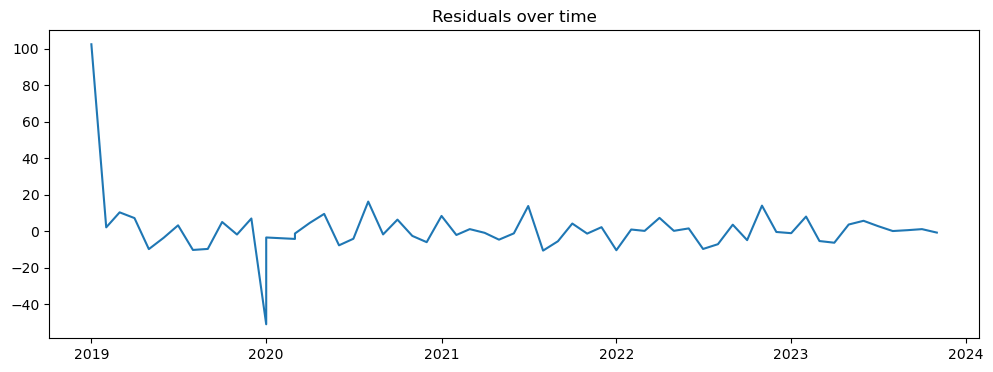

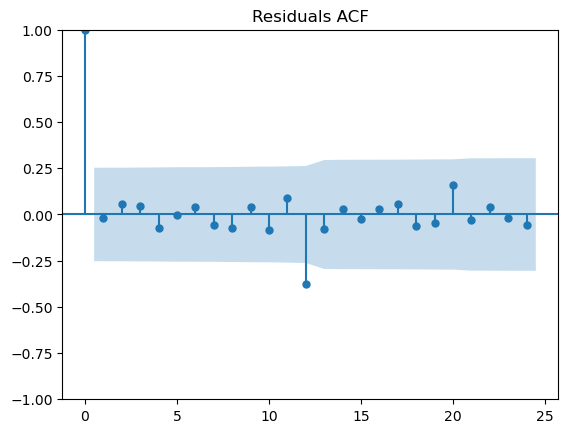

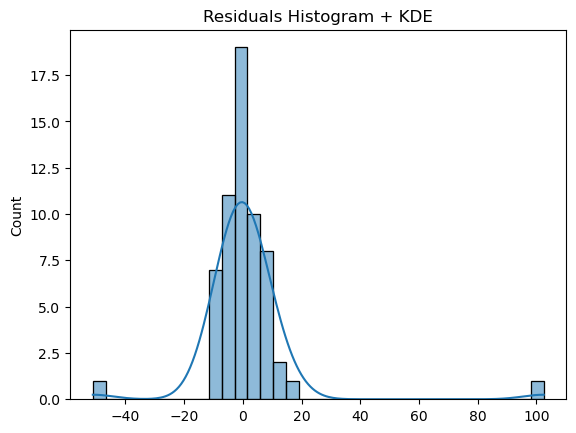

Shapiro-Wilk Test: statistic=0.5601, p-value=0.0000
Residuals deviate from normality.


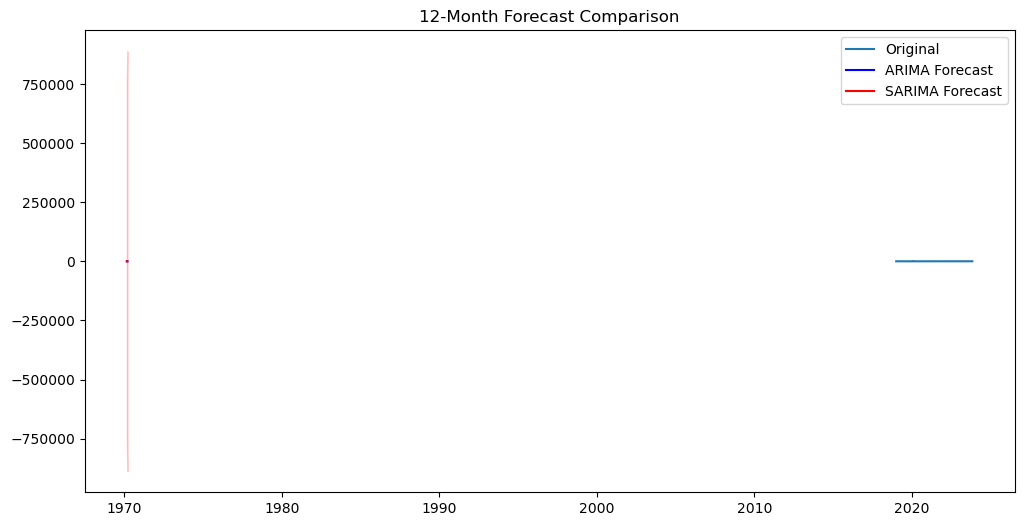

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
import seaborn as sns

# ---------------- Helper Functions ---------------- #

def fit_arima(series, order=(1,1,1)):
    model = SARIMAX(series, order=order, enforce_stationarity=False, enforce_invertibility=False)
    fit = model.fit(disp=False)
    return fit

def fit_sarima(series, order=(1,1,1), seasonal_order=(0,0,0,0)):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    fit = model.fit(disp=False)
    return fit

def forecast_and_plot(series, arima_fit, sarima_fit, steps=12):
    # ARIMA forecast
    arima_forecast = arima_fit.get_forecast(steps=steps)
    arima_mean = arima_forecast.predicted_mean
    arima_ci = arima_forecast.conf_int()

    # SARIMA forecast
    sarima_forecast = sarima_fit.get_forecast(steps=steps)
    sarima_mean = sarima_forecast.predicted_mean
    sarima_ci = sarima_forecast.conf_int()

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(series, label="Original")
    plt.plot(arima_mean, label="ARIMA Forecast", color='blue')
    plt.fill_between(arima_ci.index, arima_ci.iloc[:,0], arima_ci.iloc[:,1], color='blue', alpha=0.2)
    plt.plot(sarima_mean, label="SARIMA Forecast", color='red')
    plt.fill_between(sarima_ci.index, sarima_ci.iloc[:,0], sarima_ci.iloc[:,1], color='red', alpha=0.2)
    plt.title("12-Month Forecast Comparison")
    plt.legend()
    plt.show()

def compare_models_with_rmse(series, models, names, steps=12):
    rows = []
    for name, model in zip(names, models):
        forecast = model.get_forecast(steps=steps).predicted_mean
        rmse = np.sqrt(mean_squared_error(series[-steps:], forecast[-steps:])) if len(series) >= steps else np.nan
        rows.append([name, model.aic, model.bic, rmse])
    return pd.DataFrame(rows, columns=['Model','AIC','BIC','RMSE'])

def residual_diagnostics(fit, lags=24):
    resid = fit.resid
    plt.figure(figsize=(12,4))
    plt.plot(resid)
    plt.title("Residuals over time")
    plt.show()

    plot_acf(resid, lags=min(lags, len(resid)//2-1))
    plt.title("Residuals ACF")
    plt.show()
    
    sns.histplot(resid, kde=True)
    plt.title("Residuals Histogram + KDE")
    plt.show()
    
    from scipy.stats import shapiro
    stat, p = shapiro(resid)
    print(f"Shapiro-Wilk Test: statistic={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print("Residuals appear normally distributed.")
    else:
        print("Residuals deviate from normality.")

# ---------------- Example Workflow ---------------- #

series = df['Retail_Sales']  # Replace with your chosen series
S = 12  # Monthly seasonality

# Fit non-seasonal ARIMA (choose best from Part 3 or fit anew)
arima_fit = fit_arima(series, order=(1,1,1))  # example

# Fit SARIMA (choose seasonal orders based on analysis)
# Example: SARIMA(1,1,1)(1,1,1,12)
sarima_fit = fit_sarima(series, order=(1,1,1), seasonal_order=(1,1,1,S))

# Compare models with AIC, BIC, RMSE
comparison_table = compare_models_with_rmse(series, [arima_fit, sarima_fit], ['ARIMA', 'SARIMA'], steps=12)
print(comparison_table)

# Residual diagnostics on best model (choose based on AIC/BIC/RMSE)
print("\nResidual Diagnostics for SARIMA:")
residual_diagnostics(sarima_fit)

# Forecast comparison
forecast_and_plot(series, arima_fit, sarima_fit, steps=12)
